### Análisis de datos con Python: MEDULOBLASTOMA

## Setting up Environment:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sfm
from scipy import interp
from scipy.optimize import fsolve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import statsmodels.api

## Reading Database:

In [ ]:
df = pd.read_excel('/content/MEDULOBLASTOMA.xlsx')
df

MASCULINO COD   EDAD COD  ...  RECAIDA COD  MUERTE COD
0               1   8.942466  ...            1           1
1               0   8.104110  ...            0           0
2               0   7.742466  ...            0           0
3               1   3.342466  ...            0           0
4               0  12.189041  ...            0           0
5               1  16.216438  ...            0           0
6               0   9.808219  ...            0           0
7               0   6.575342  ...            0           1
8               1   7.668493  ...            1           0
9               0   4.624658  ...            0           0
10              1   5.580822  ...            1           1
11              1   2.449315  ...            1           1
12              1  16.964384  ...            1           0
13              0  13.638356  ...            1           0
14              1  12.893151  ...            0           1
15              1   3.049315  ...            0           0
16              1   2.123288  ...            1           1
17              0   4.298630  ...            0           0
18              0  12.819178  ...            0           0
19              1  11.802740  ...            0           1
20              1  14.528767  ...            0           0
21              1   6.164384  ...            0           1
22              0   7.764384  ...            0           1
23              0   9.293151  ...            1           0
24              1   4.493151  ...            0           1
25              0  10.136986  ...            0           0
26              1   8.846575  ...            0           0
27              0   2.419178  ...            0           0
28              1   6.736986  ...            0           1
29              1  14.408219  ...            0           1
30              1   4.887671  ...            0           0
31              1   7.495890  ...            0           0
32              1  16.994521  ...            0           0
33              1   8.035616  ...            0           0
34              0   6.758904  ...            0           0
35              0  15.027397  ...            0           0
36              1  16.463014  ...            1           0

[37 rows x 20 columns]

In [ ]:
df.describe()

MASCULINO COD   EDAD COD  ...  RECAIDA COD  MUERTE COD
count      37.000000  37.000000  ...    37.000000   37.000000
mean        0.594595   8.953721  ...     0.243243    0.324324
std         0.497743   4.492434  ...     0.434959    0.474579
min         0.000000   2.123288  ...     0.000000    0.000000
25%         0.000000   5.580822  ...     0.000000    0.000000
50%         1.000000   8.035616  ...     0.000000    0.000000
75%         1.000000  12.819178  ...     0.000000    1.000000
max         1.000000  16.994521  ...     1.000000    1.000000

[8 rows x 20 columns]

In [ ]:
df.dtypes

MASCULINO COD             int64
EDAD COD                float64
CEFALEA COD             float64
VOMITO COD              float64
IRRITABILIDAD COD       float64
ATAXIA COD              float64
OTROS COD               float64
TIEMPO EVOLUCION COD    float64
PATOLOGIA COD             int64
RESECCION COD           float64
RESIDUO COD             float64
RNM COD                 float64
LCR COD                 float64
RIESGO COD              float64
DIAS RES-RT COD         float64
RADIOTERAPIA COD        float64
VINCRISTINA COD         float64
QT CONSOLIDACION COD    float64
RECAIDA COD               int64
MUERTE COD                int64
dtype: object

In [ ]:
df.columns

Index(['MASCULINO COD', 'EDAD COD', 'CEFALEA COD', 'VOMITO COD',
       'IRRITABILIDAD COD', 'ATAXIA COD', 'OTROS COD', 'TIEMPO EVOLUCION COD',
       'PATOLOGIA COD', 'RESECCION COD', 'RESIDUO COD', 'RNM COD', 'LCR COD',
       'RIESGO COD', 'DIAS RES-RT COD', 'RADIOTERAPIA COD', 'VINCRISTINA COD',
       'QT CONSOLIDACION COD', 'RECAIDA COD', 'MUERTE COD'],
      dtype='object')

## Testing Completitude

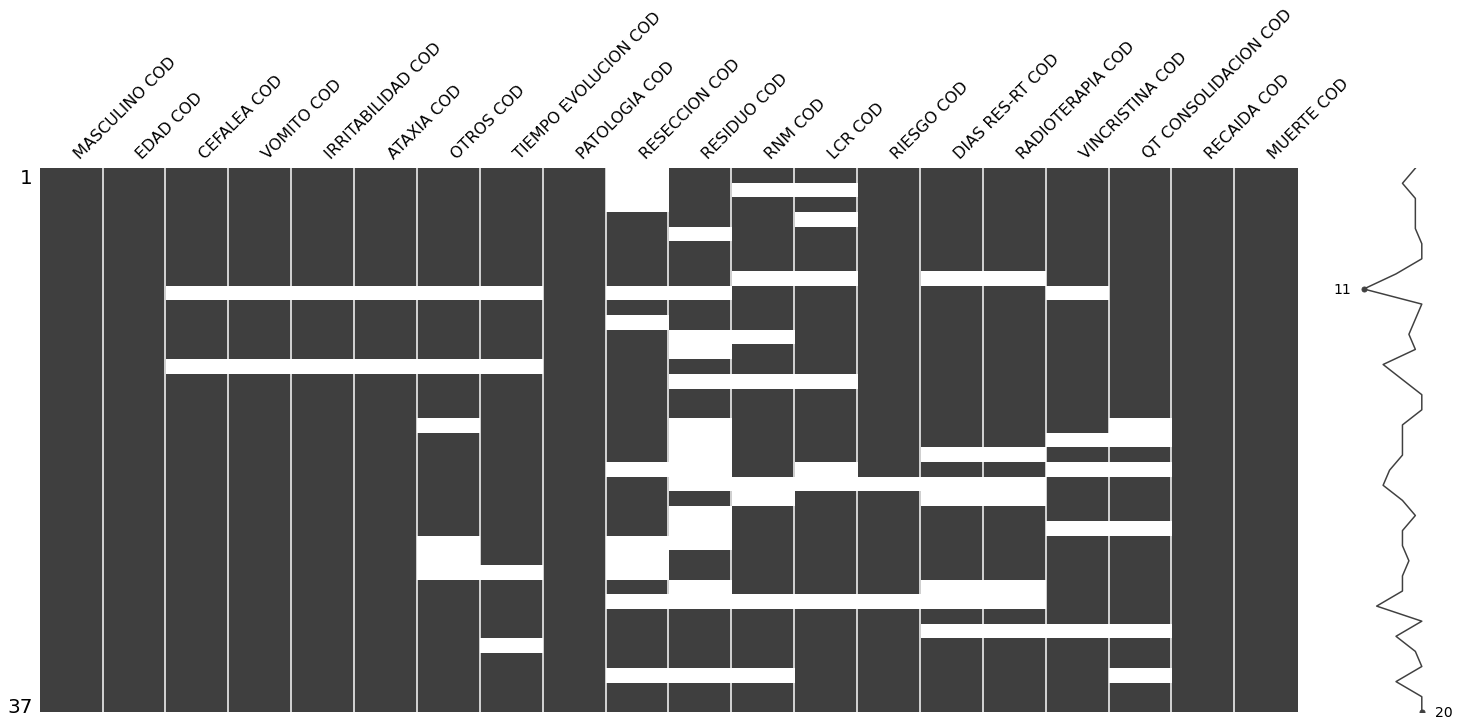

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

MASCULINO COD            0
EDAD COD                 0
CEFALEA COD              2
VOMITO COD               2
IRRITABILIDAD COD        2
ATAXIA COD               2
OTROS COD                6
TIEMPO EVOLUCION COD     4
PATOLOGIA COD            0
RESECCION COD           11
RESIDUO COD             16
RNM COD                  8
LCR COD                  7
RIESGO COD               2
DIAS RES-RT COD          7
RADIOTERAPIA COD         7
VINCRISTINA COD          5
QT CONSOLIDACION COD     6
RECAIDA COD              0
MUERTE COD               0
dtype: int64

## Correlations:

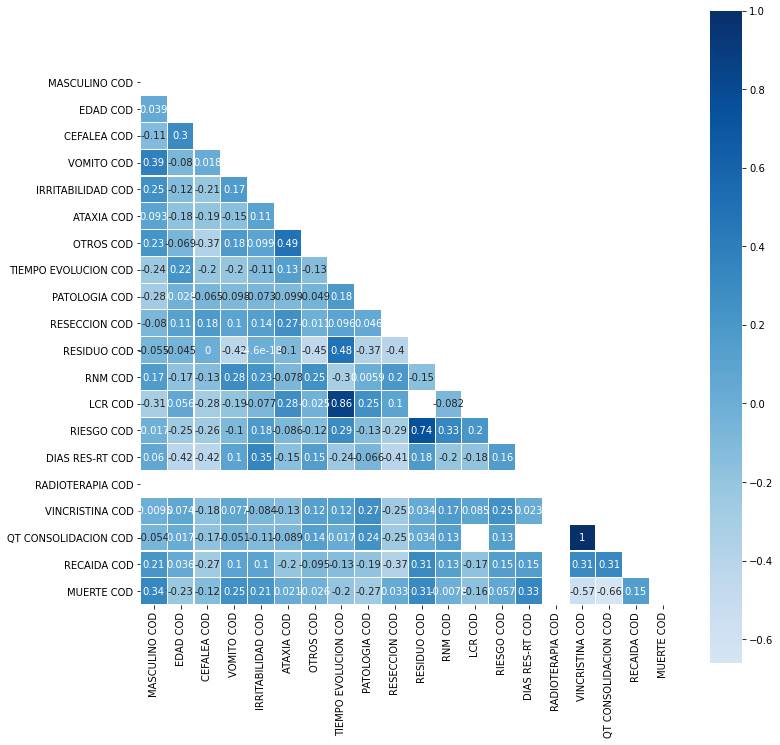

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0,
            square=True, linewidths=.1, annot = True)

In [ ]:
list_to_plot = df.columns

## Boxplots:

In [ ]:
list_to_plot1 = [ 'EDAD COD', 'TIEMPO EVOLUCION COD','DIAS RES-RT COD']

EDAD COD


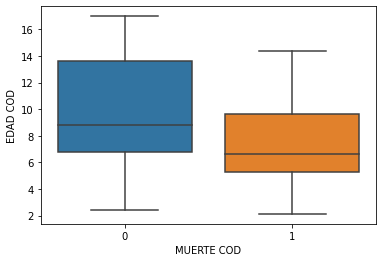

TIEMPO EVOLUCION COD


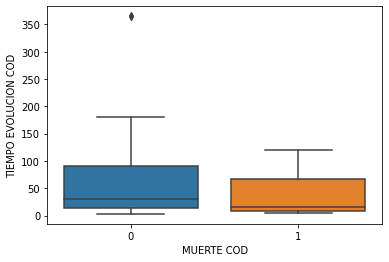

DIAS RES-RT COD


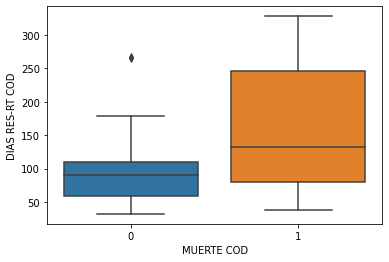

In [ ]:
for i in list_to_plot1:
  print(i)
  fig, ax = plt.subplots()
  sns.boxplot(data = df, y=i, x = 'MUERTE COD')
  plt.show()

EDAD COD


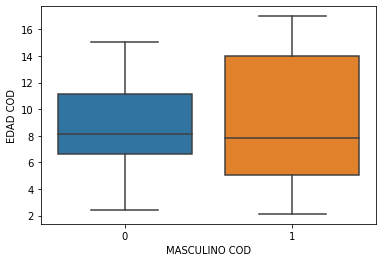

TIEMPO EVOLUCION COD


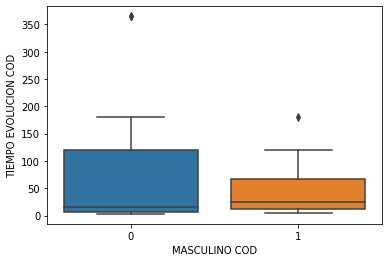

DIAS RES-RT COD


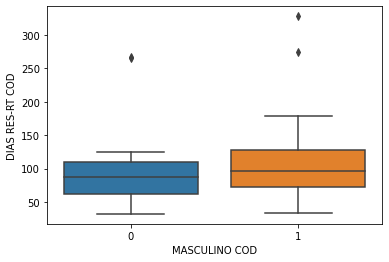

In [ ]:
for i in list_to_plot1:
  print(i)
  fig, ax = plt.subplots()
  sns.boxplot(data = df, y=i, x = 'MASCULINO COD')
  plt.show()

## Density Functions:

MASCULINO COD


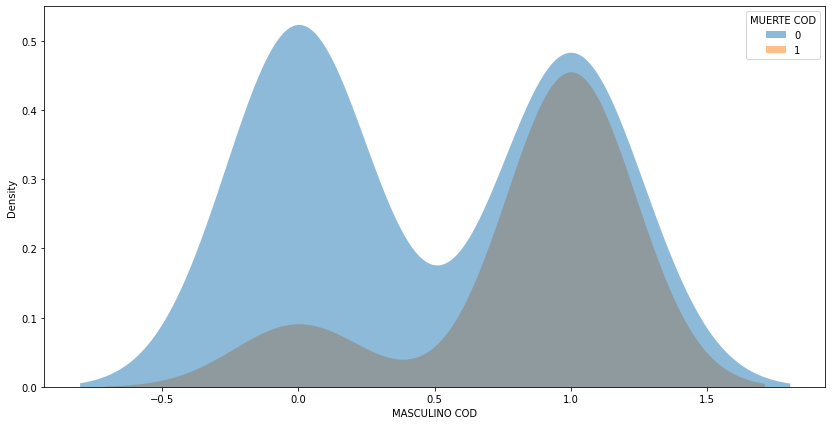

EDAD COD


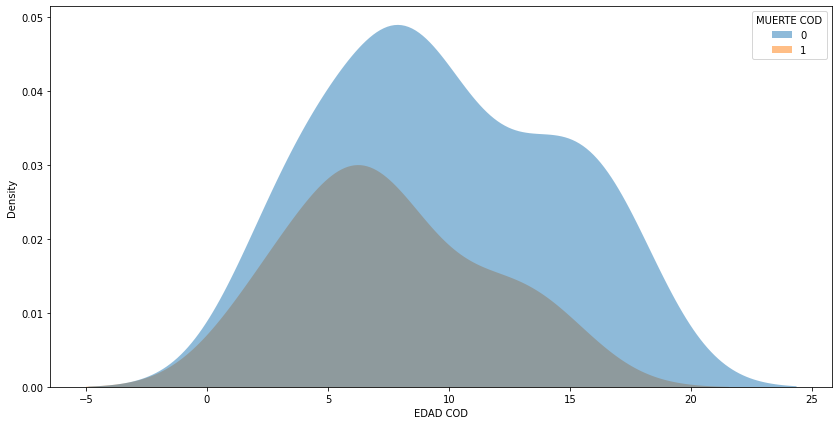

CEFALEA COD


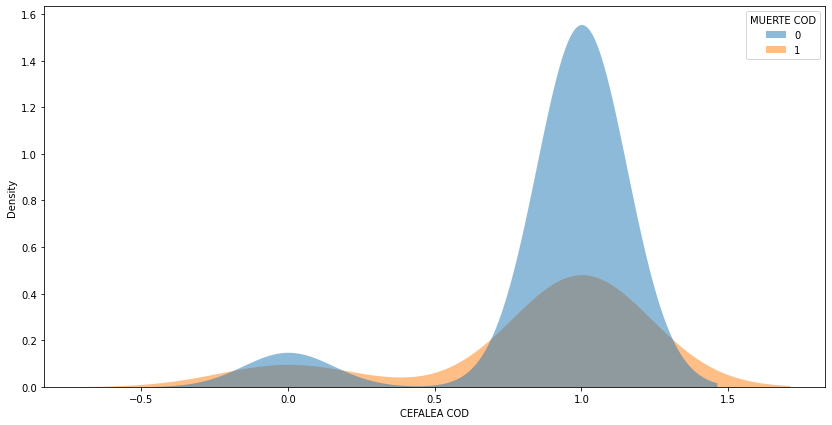

VOMITO COD


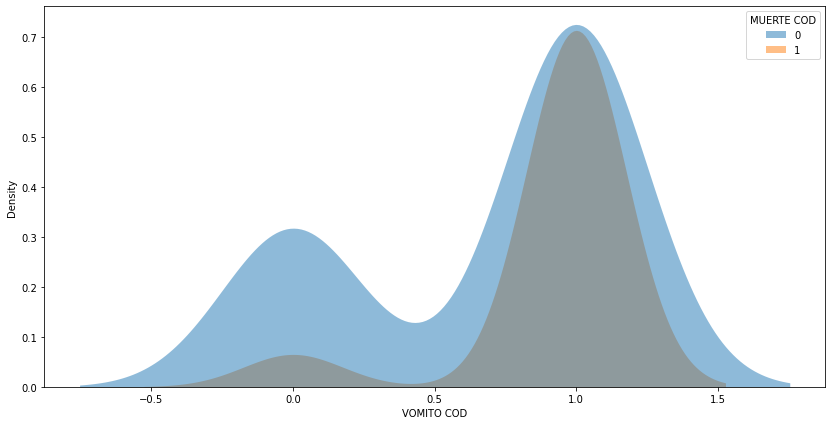

IRRITABILIDAD COD


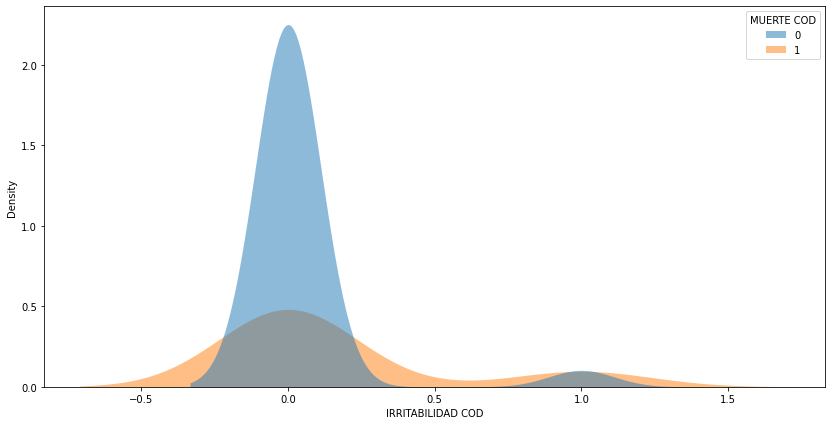

ATAXIA COD


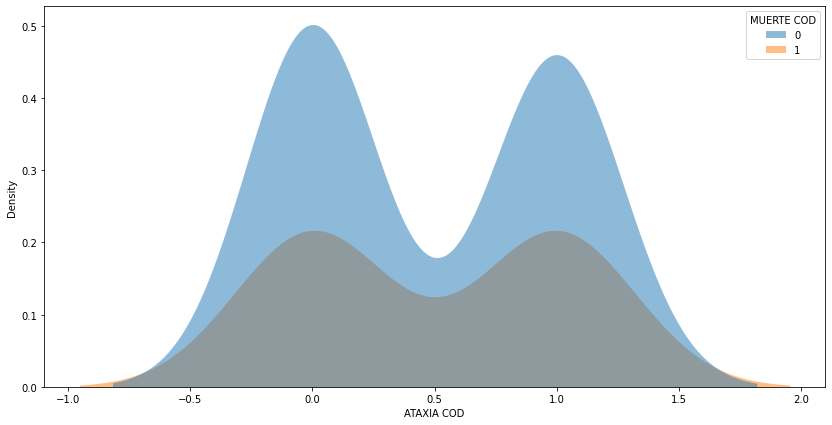

OTROS COD


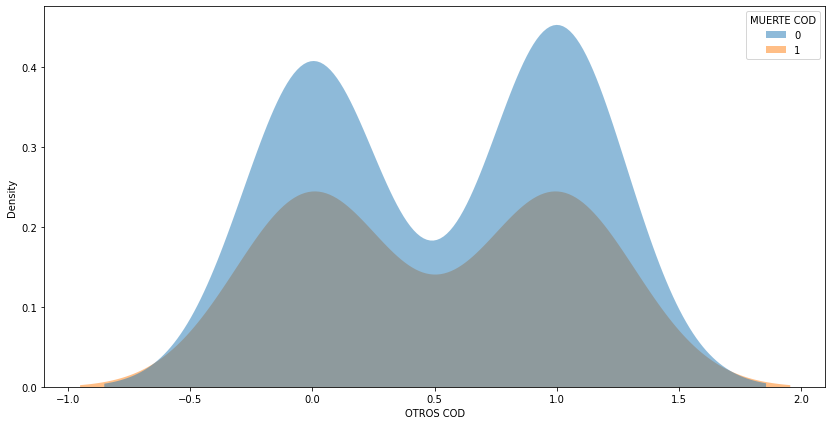

TIEMPO EVOLUCION COD


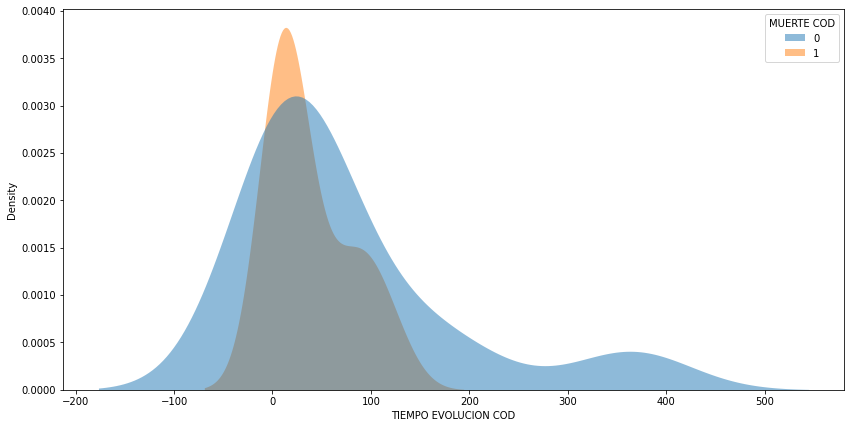

PATOLOGIA COD


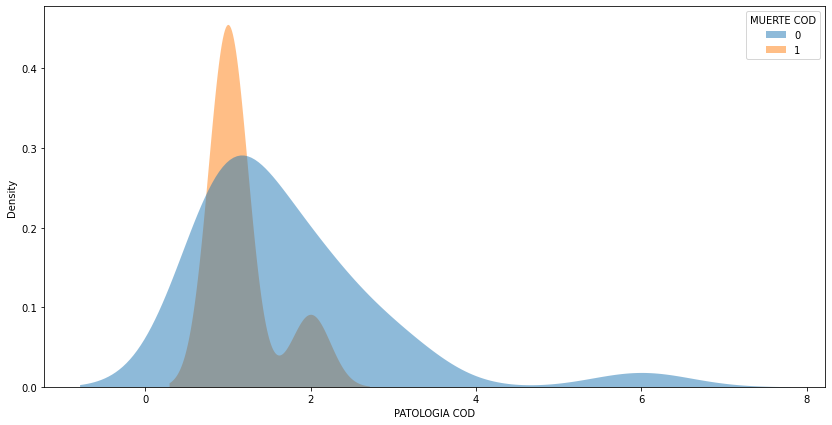

RESECCION COD


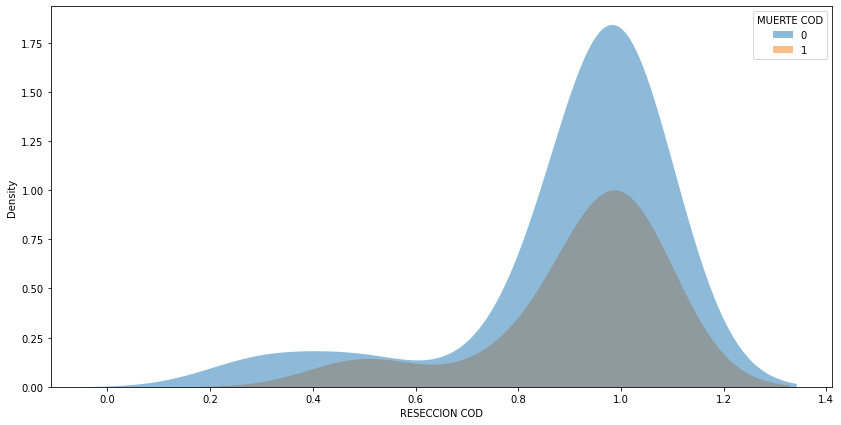

RESIDUO COD


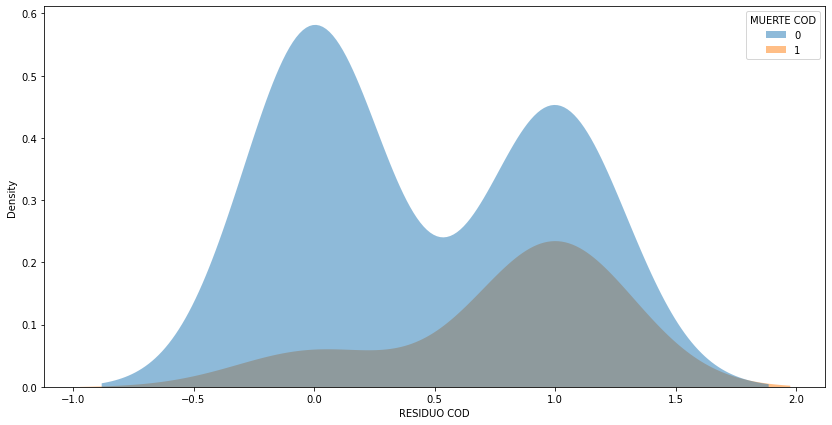

RNM COD


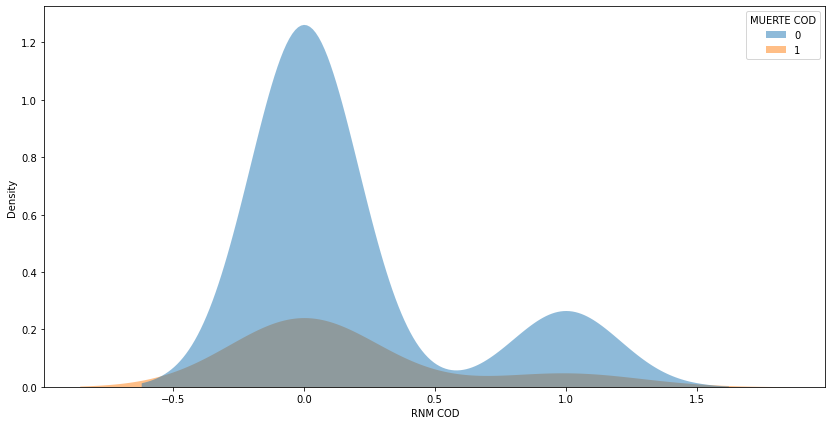

LCR COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


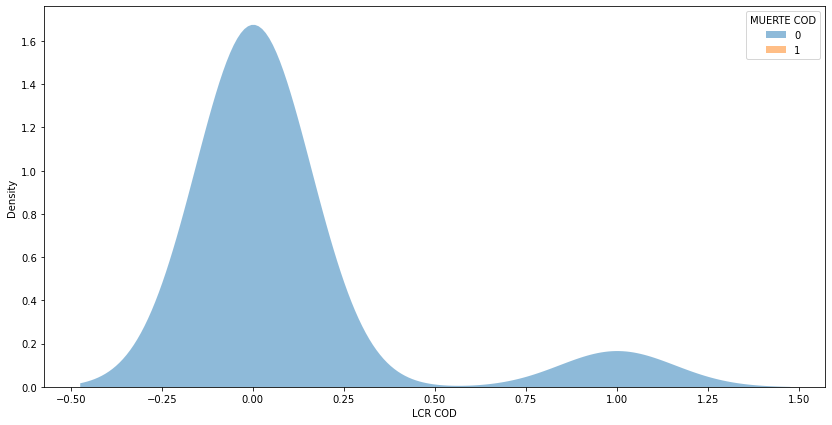

RIESGO COD


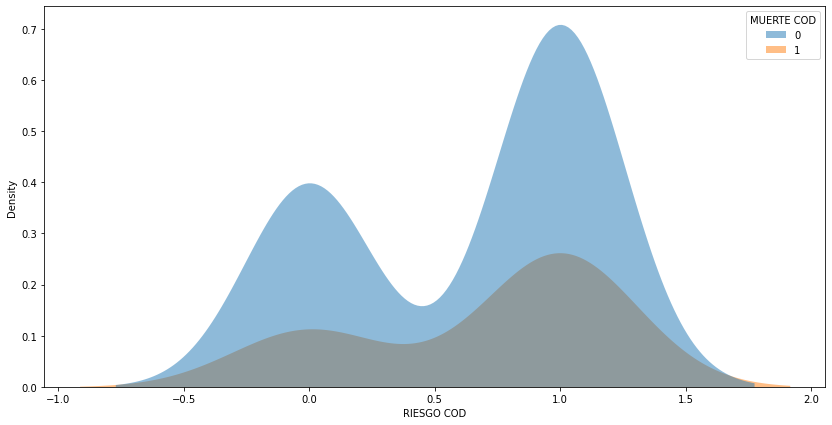

DIAS RES-RT COD


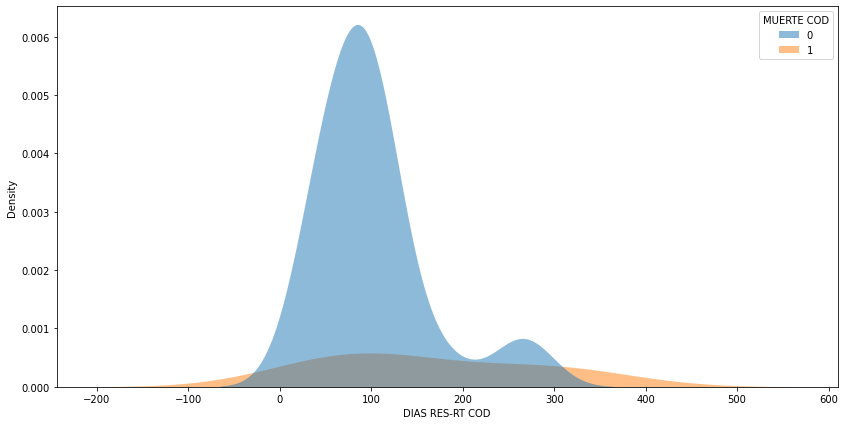

RADIOTERAPIA COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


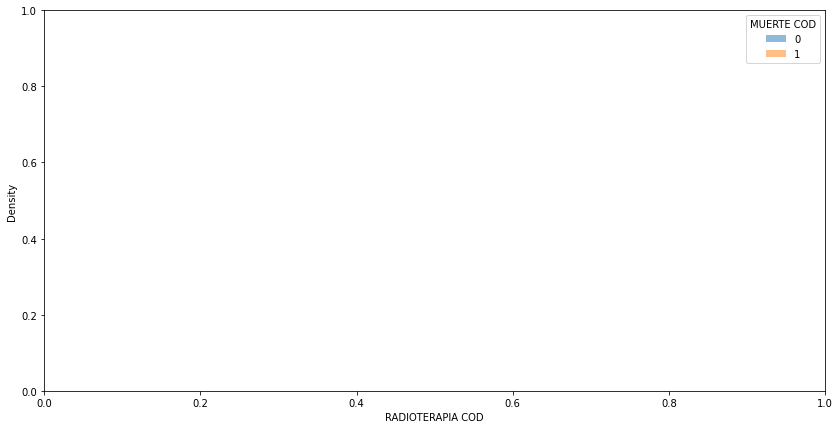

VINCRISTINA COD


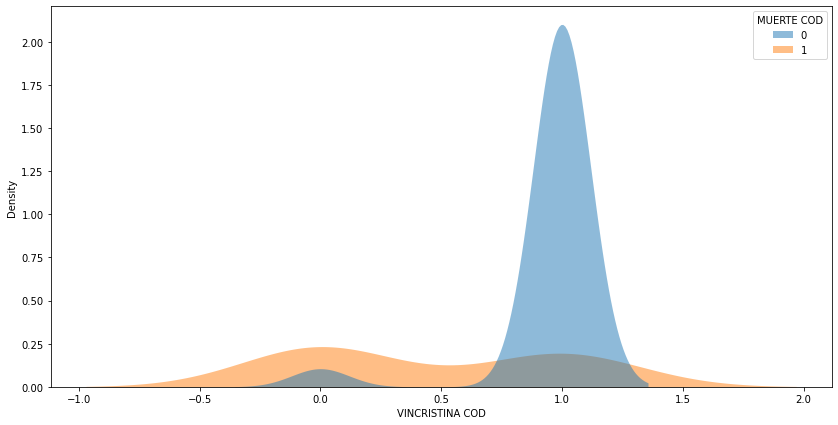

QT CONSOLIDACION COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


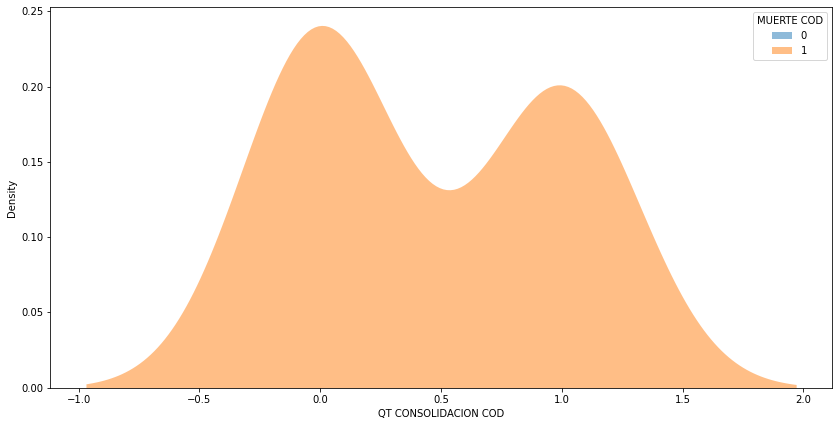

RECAIDA COD


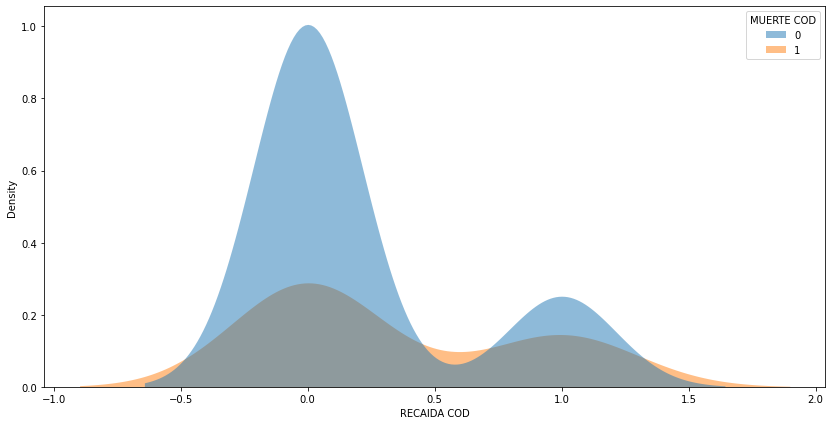

MUERTE COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


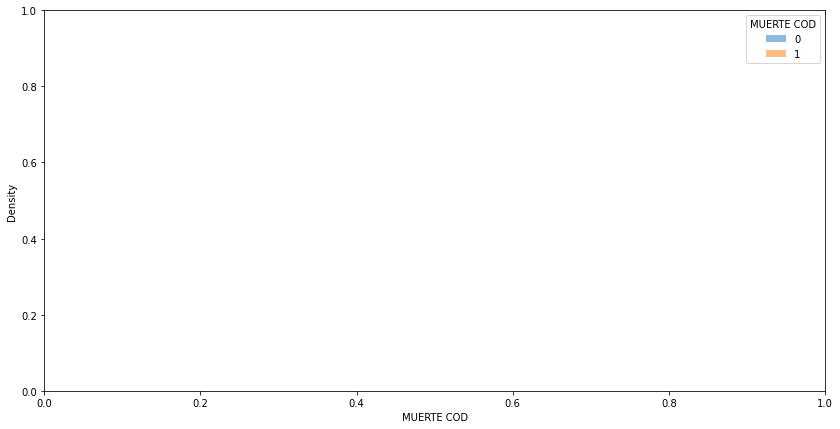

In [ ]:
for i in list_to_plot:
  print(i)
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'MUERTE COD', fill=True, alpha=.5, linewidth=0)
  plt.show()

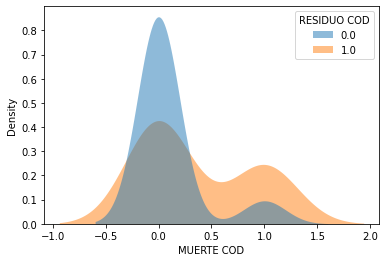

In [ ]:
sns.kdeplot(data = df, x='MUERTE COD', hue = 'RESIDUO COD', fill=True, alpha=.5, linewidth=0, palette='tab10')

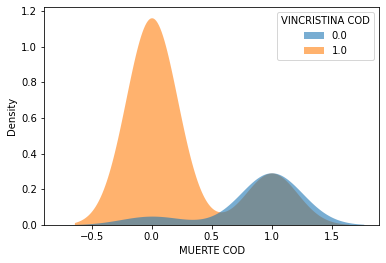

In [ ]:
sns.kdeplot(data = df, x='MUERTE COD', hue = 'VINCRISTINA COD', fill=True, alpha=.6, linewidth=0, palette="tab10")

MASCULINO COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


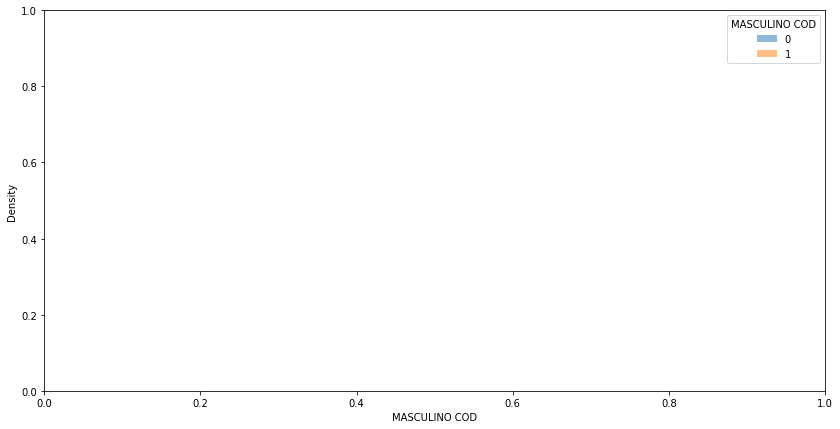

EDAD COD


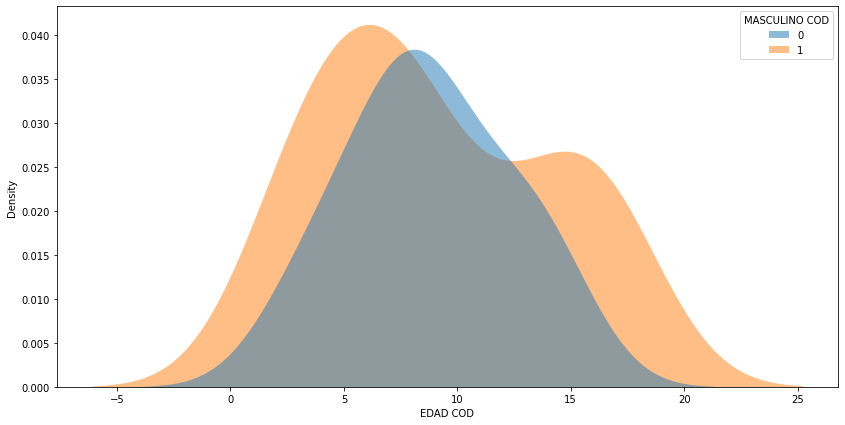

CEFALEA COD


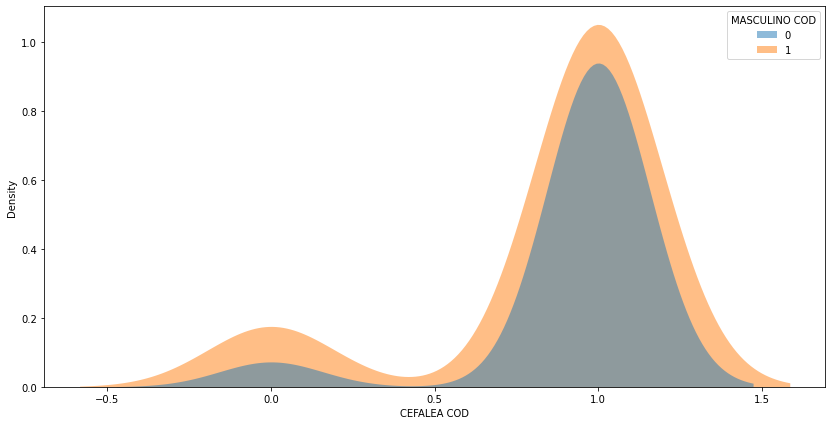

VOMITO COD


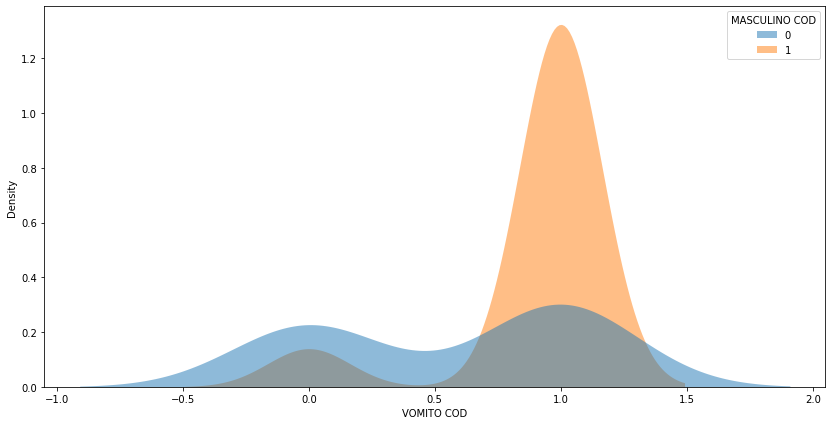

IRRITABILIDAD COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


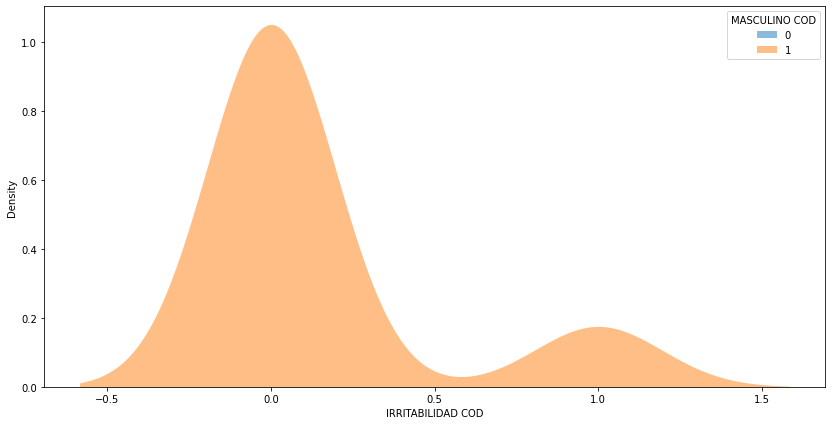

ATAXIA COD


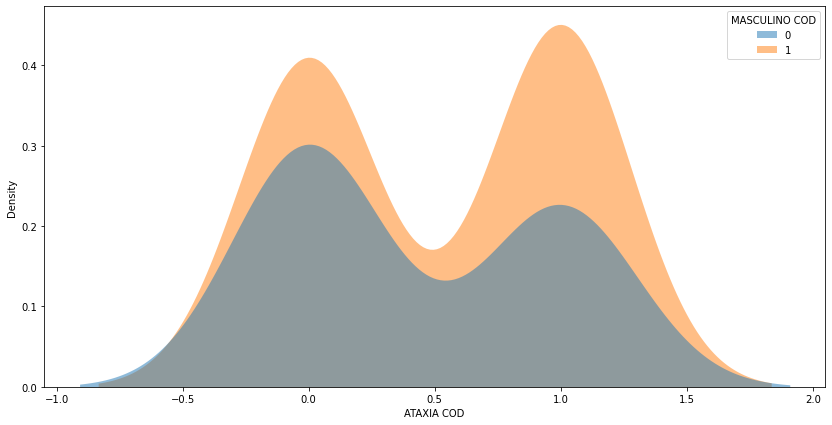

OTROS COD


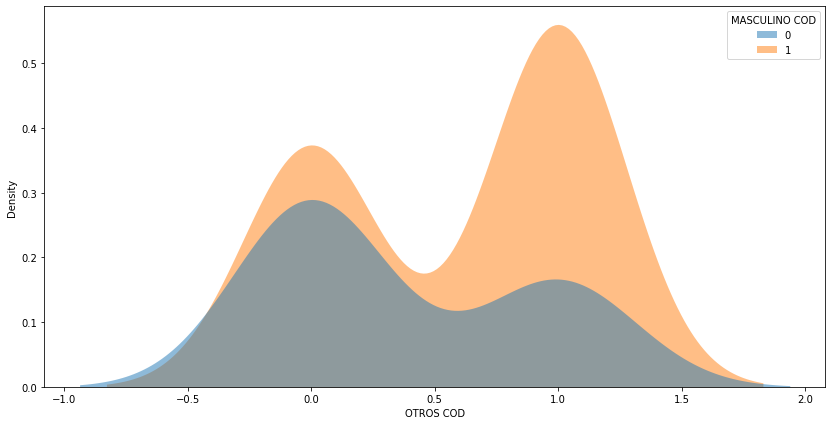

TIEMPO EVOLUCION COD


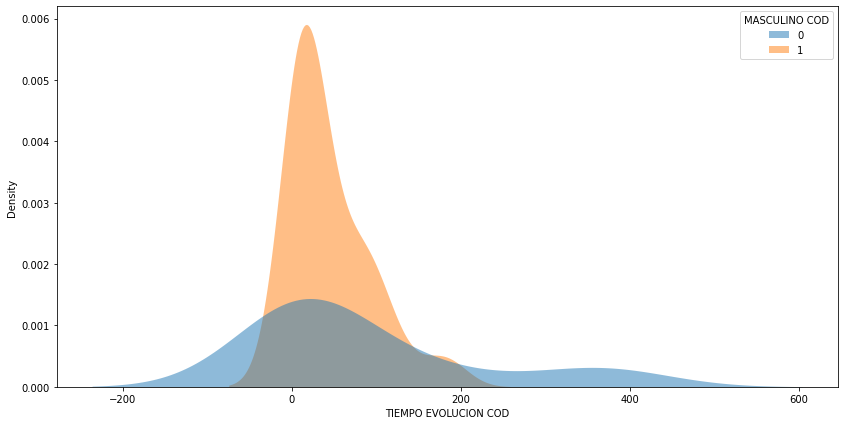

PATOLOGIA COD


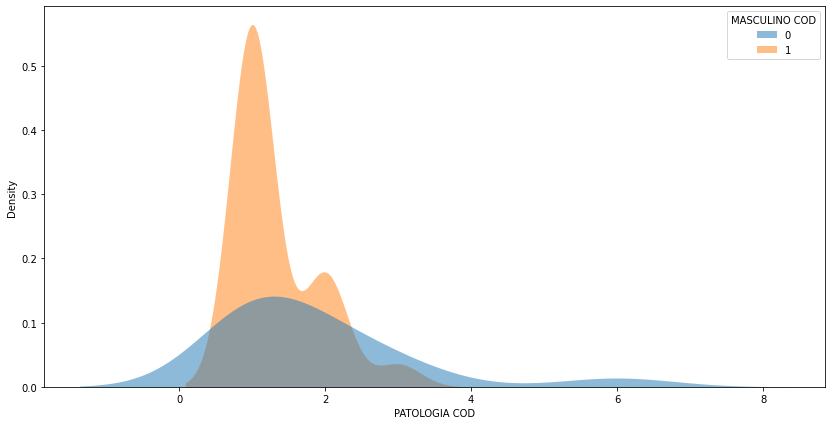

RESECCION COD


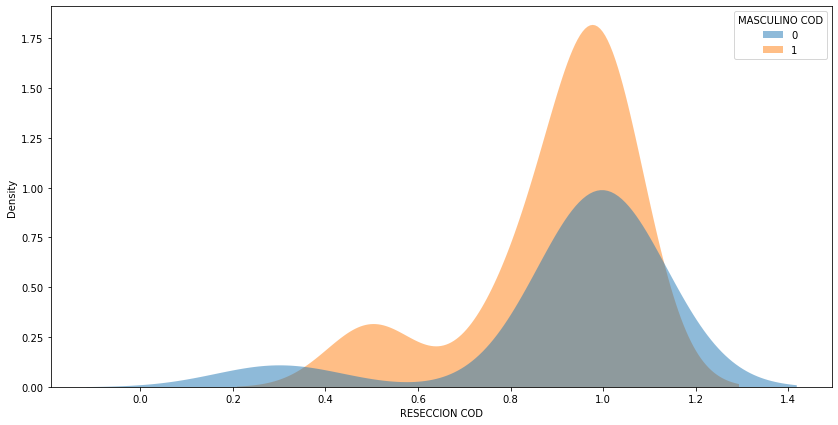

RESIDUO COD


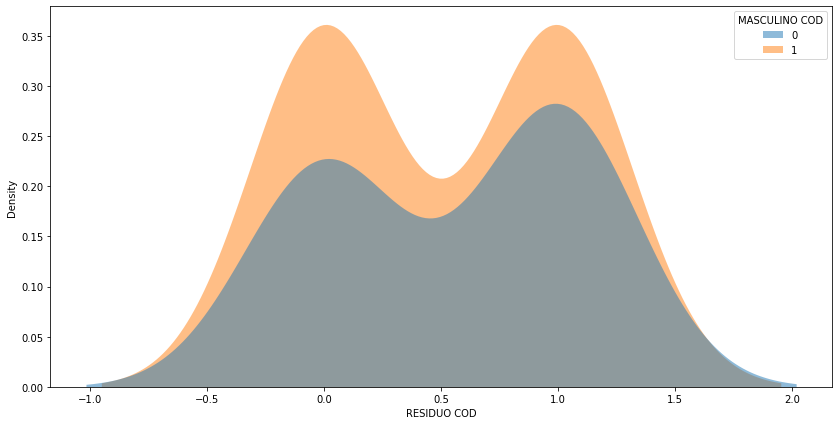

RNM COD


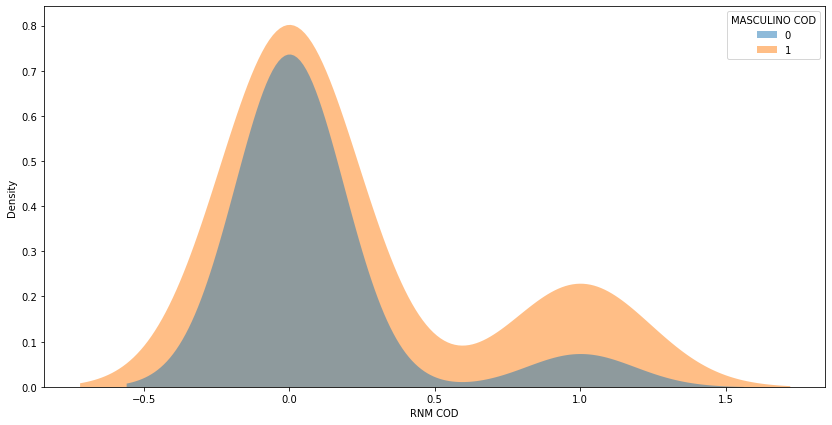

LCR COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


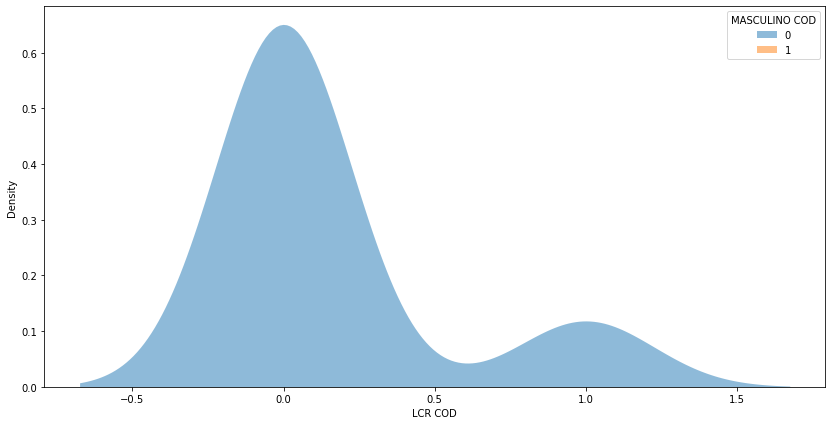

RIESGO COD


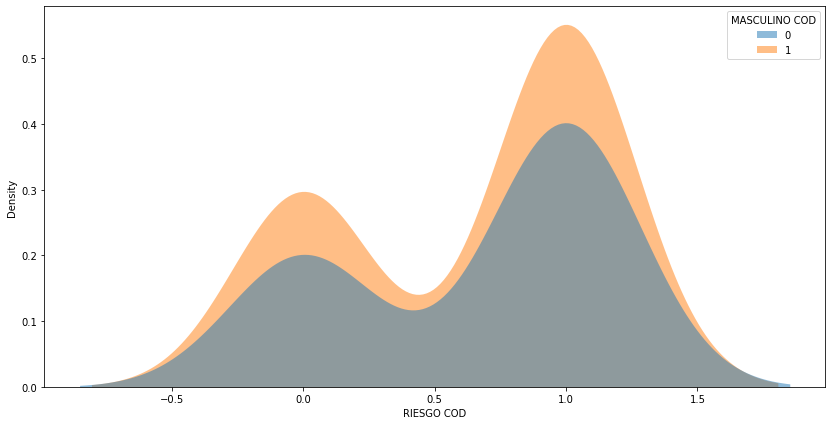

DIAS RES-RT COD


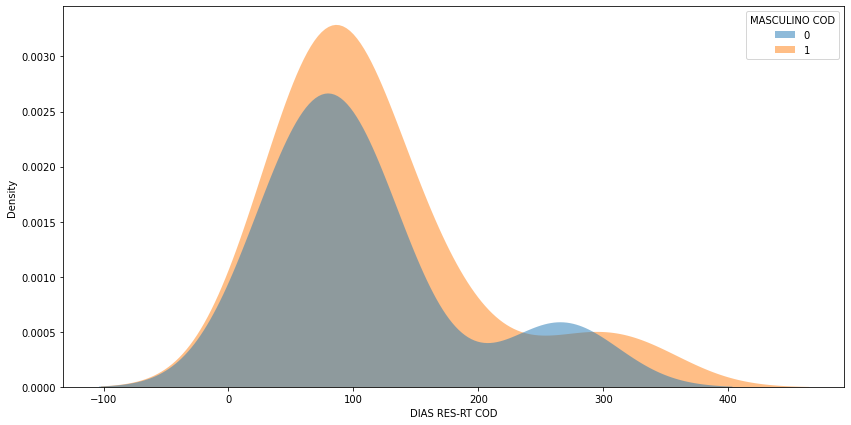

RADIOTERAPIA COD


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


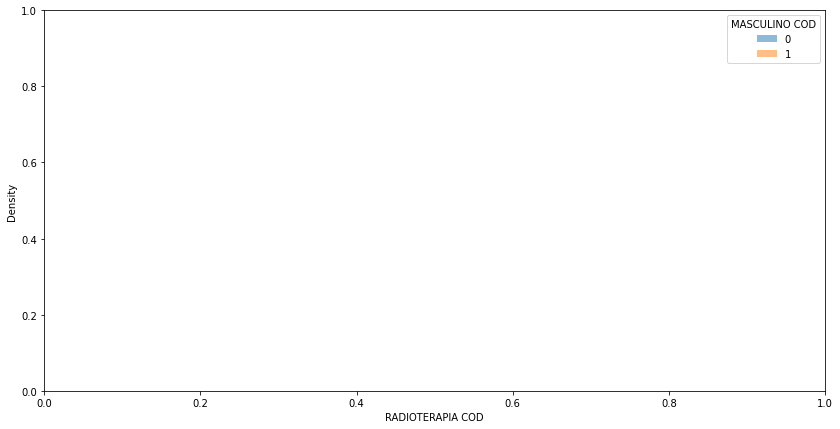

VINCRISTINA COD


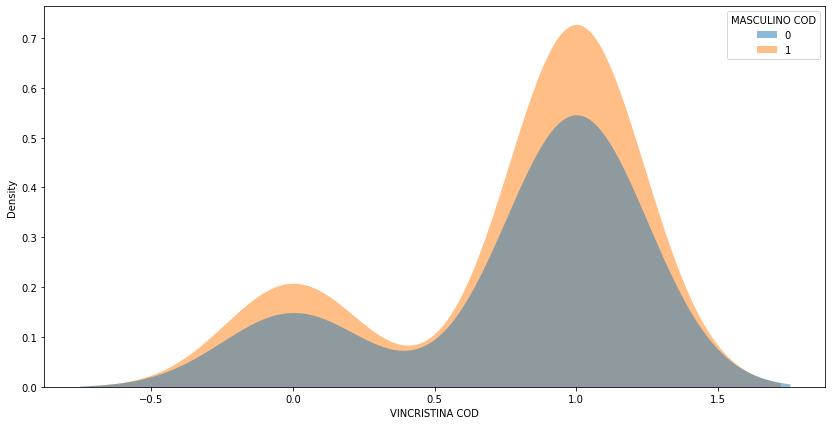

QT CONSOLIDACION COD


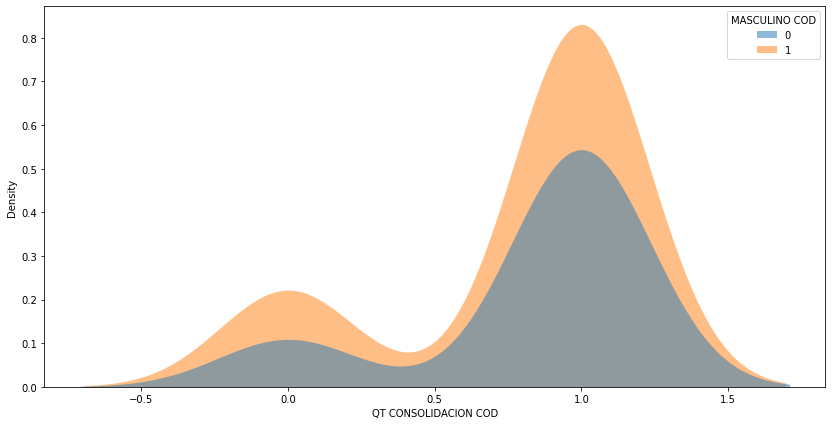

RECAIDA COD


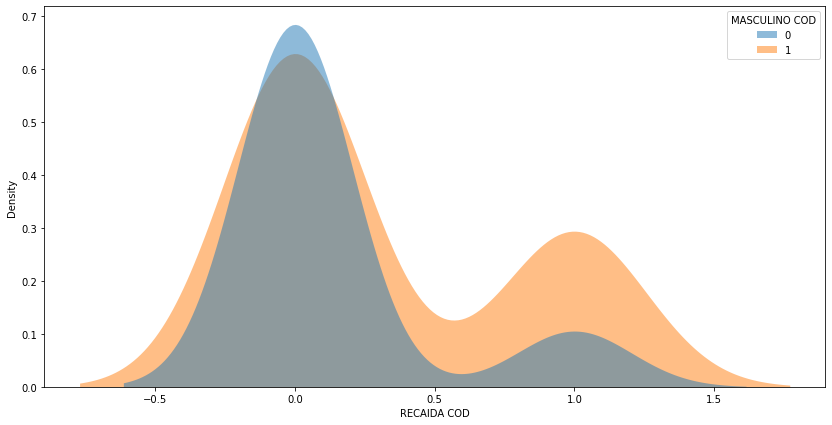

MUERTE COD


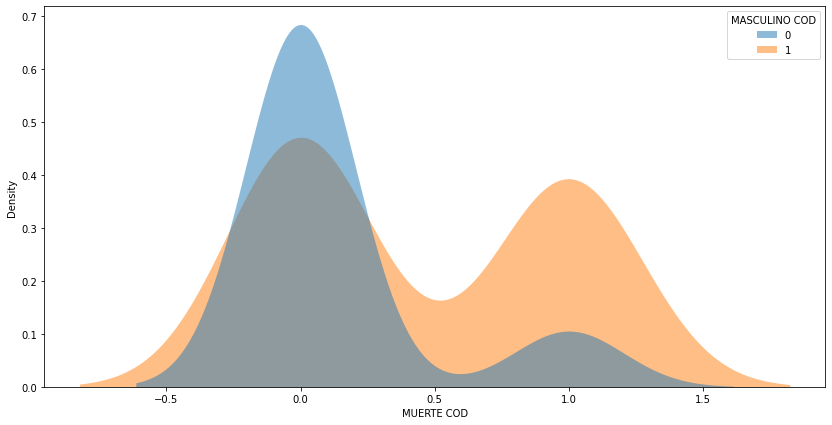

In [ ]:
for i in list_to_plot:
  print(i)
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'MASCULINO COD', fill=True, alpha=.5, linewidth=0)
  plt.show()

## Crosstabs

In [ ]:
pd.crosstab(df['VINCRISTINA COD'], df['MUERTE COD'])

MUERTE COD        0  1
VINCRISTINA COD       
0.0               1  6
1.0              20  5

In [ ]:
contingency = pd.crosstab(df['VINCRISTINA COD'], df['MUERTE COD'])
c, p_val, dof, expected = chi2_contingency(contingency)
if p_val < 0.05:
  print('True')
else:
  print('False')

True


In [ ]:
contingency = pd.crosstab(df['VINCRISTINA COD'], df['MUERTE COD'])
c, p_val, dof, expected = chi2_contingency(contingency)
if p_val < 0.05:
  print('True')k
  else:
    print('False')

In [ ]:
pd.crosstab(df['MASCULINO COD'], df['MUERTE COD'])

MUERTE COD      0   1
MASCULINO COD        
0              13   2
1              12  10

In [ ]:
contingency = pd.crosstab(df['MASCULINO COD'], df['MUERTE COD'])
c, p_val, dof, expected = chi2_contingency(contingency)
if p_val < 0.05:
  print('True')
else:
  print('False')

False


In [ ]:
pd.crosstab(df['RESIDUO COD'], df['MUERTE COD'])

MUERTE COD   0  1
RESIDUO COD      
0.0          9  1
1.0          7  4

In [ ]:
contingency = pd.crosstab(df['RESIDUO COD'], df['MUERTE COD'])
c, p_val, dof, expected = chi2_contingency(contingency)
if p_val < 0.05:
  print('True')
else:
  print('False')

False


In [ ]:
pd.crosstab(df['VINCRISTINA COD'], df['MUERTE COD'])

MUERTE COD        0  1
VINCRISTINA COD       
0.0               1  6
1.0              20  5

In [ ]:
contingency = pd.crosstab(df['VINCRISTINA COD'], df['MUERTE COD'])
c, p_val, dof, expected = chi2_contingency(contingency)
if p_val < 0.05:
  print('True')
else:
  print('False')

True


## Jointplots:

In [ ]:
for i in list_to_plot:
  print(i)
  fig2, ax = plt.subplots()
  sns.jointplot(data = df, x="EDAD COD", y="DIAS RES-RT COD", hue=i, palette="tab10")
  plt.show()

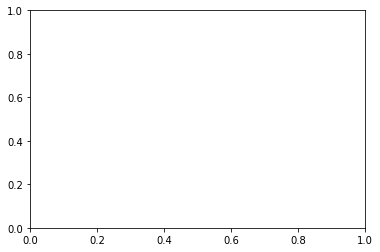

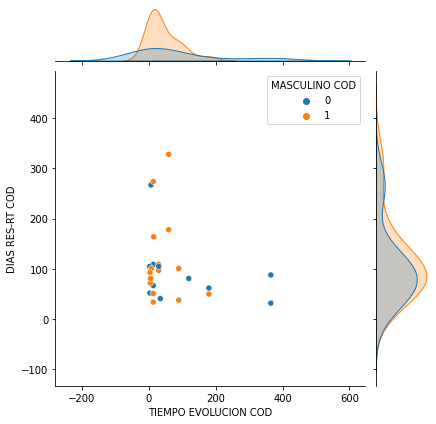

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

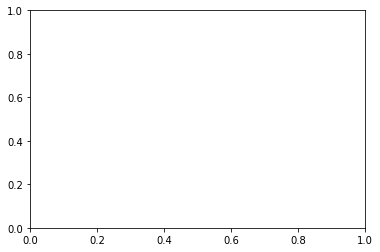

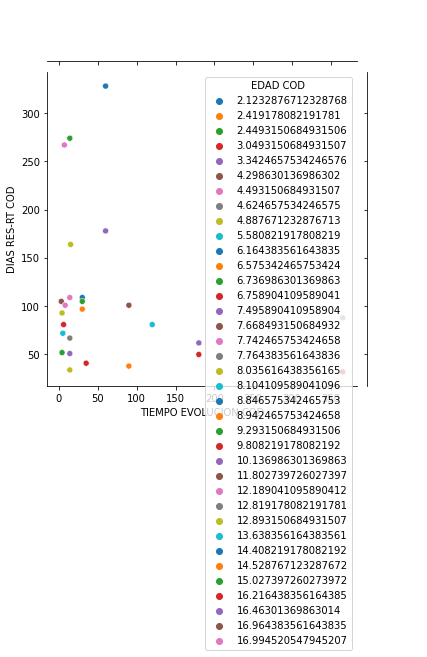

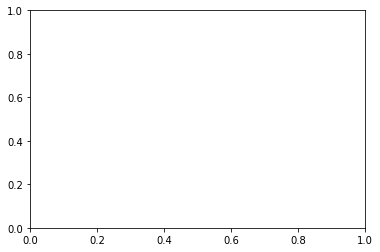

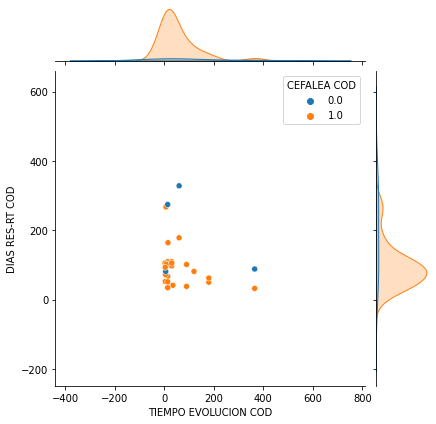

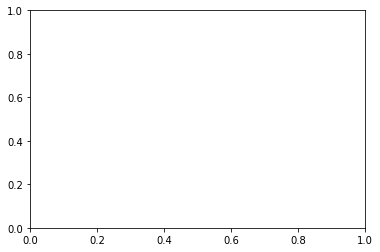

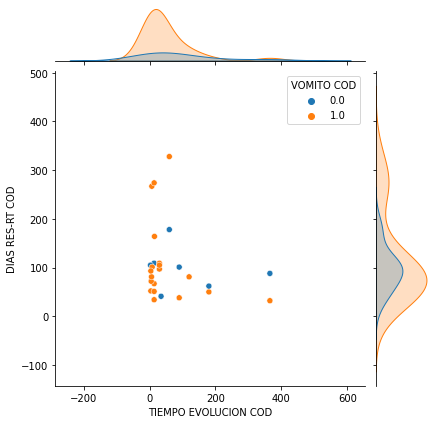

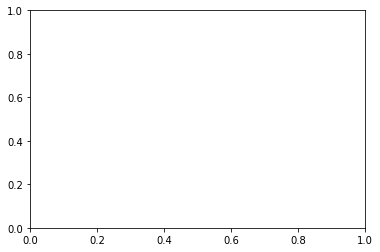

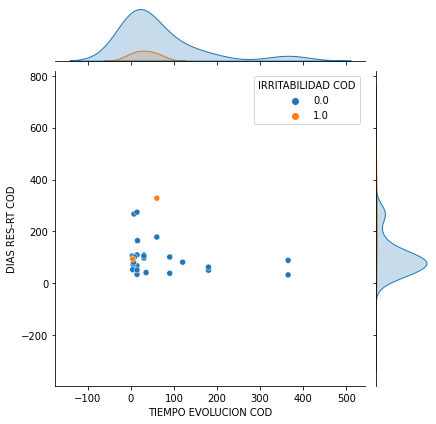

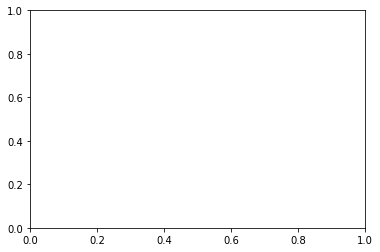

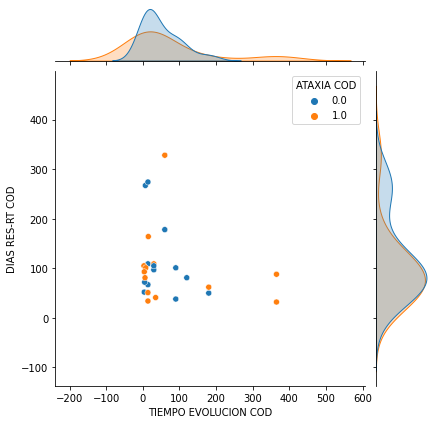

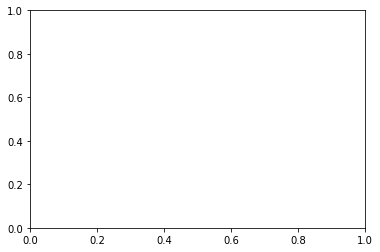

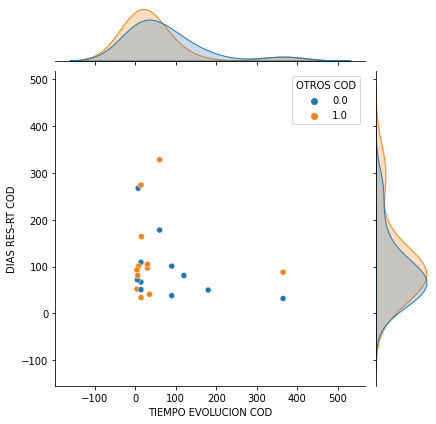

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

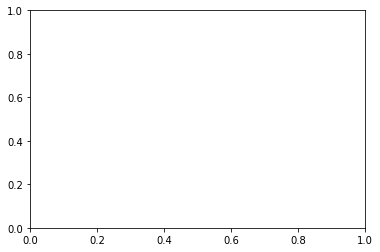

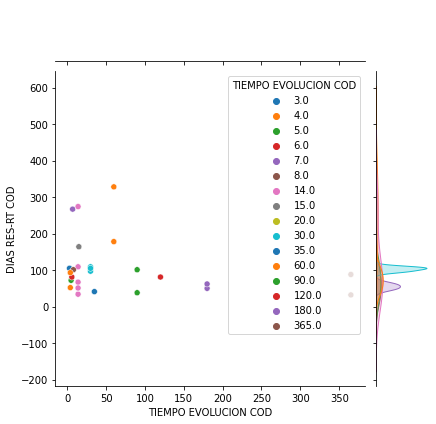

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


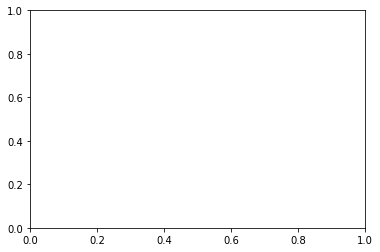

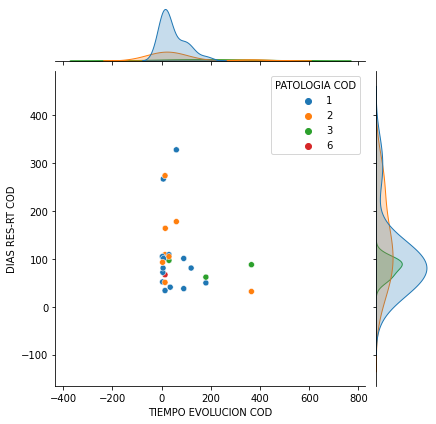

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

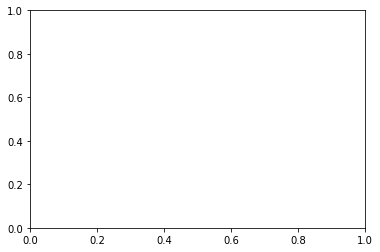

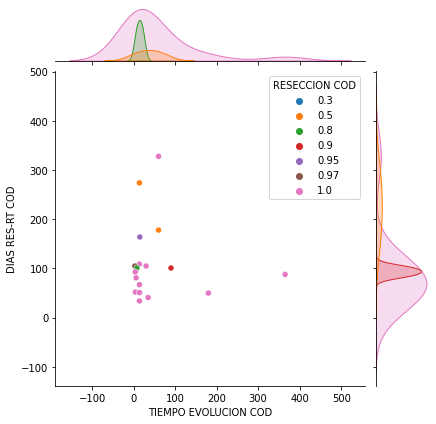

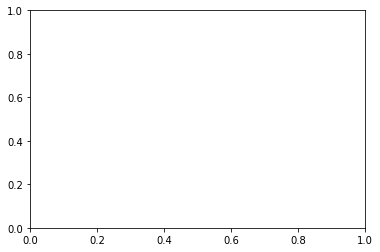

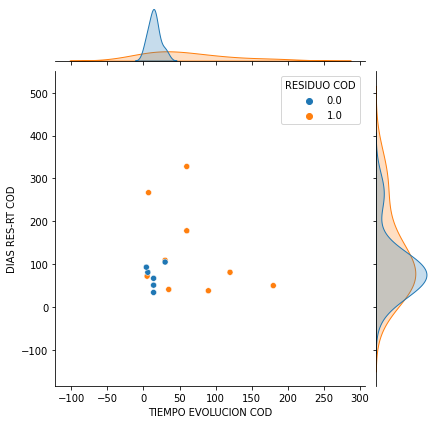

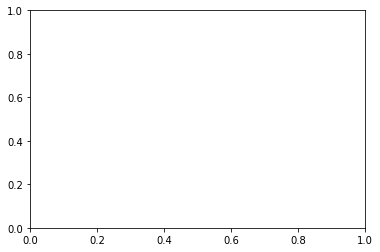

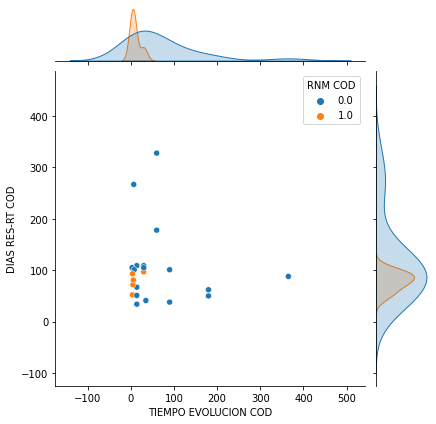

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


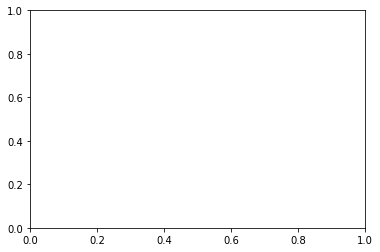

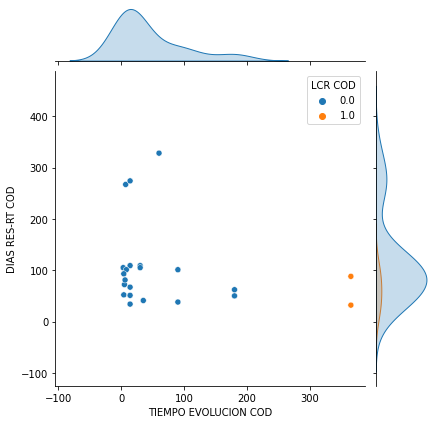

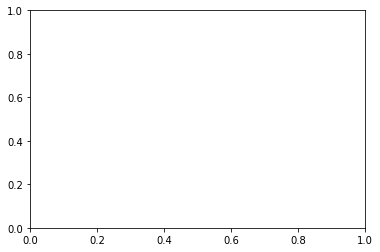

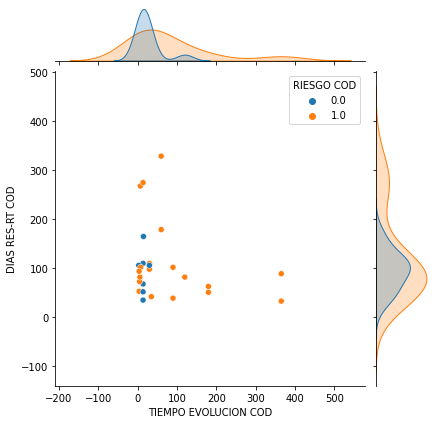

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

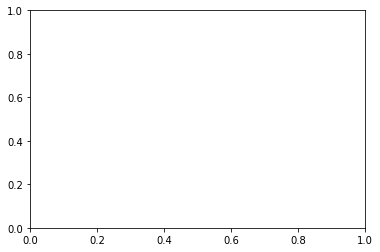

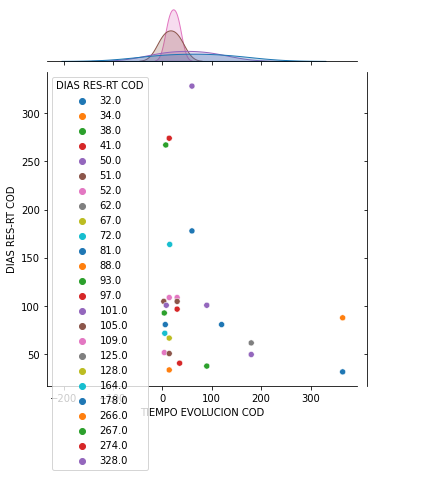

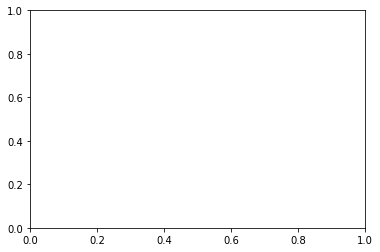

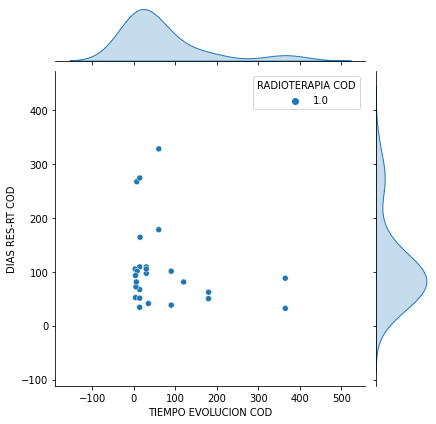

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


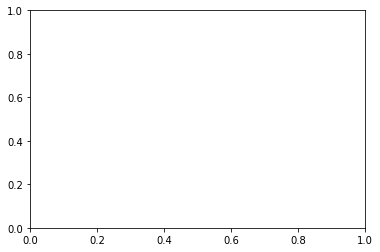

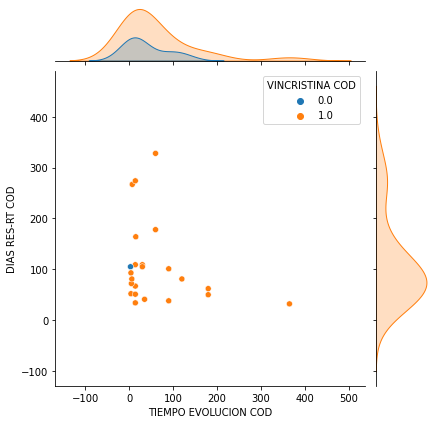

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


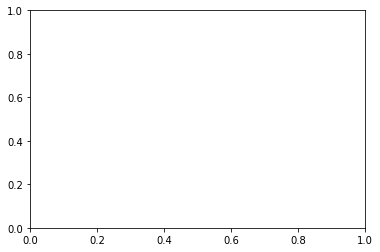

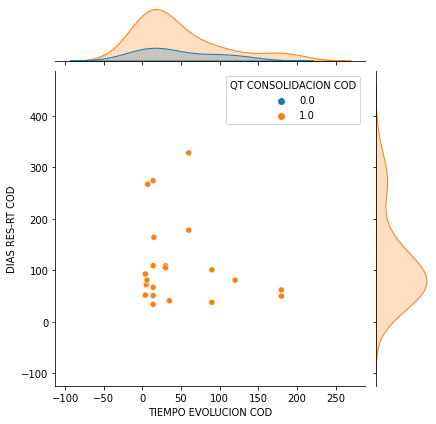

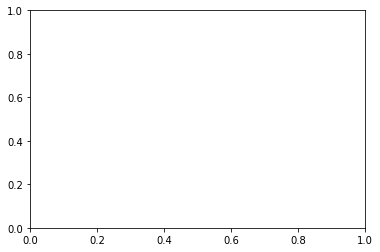

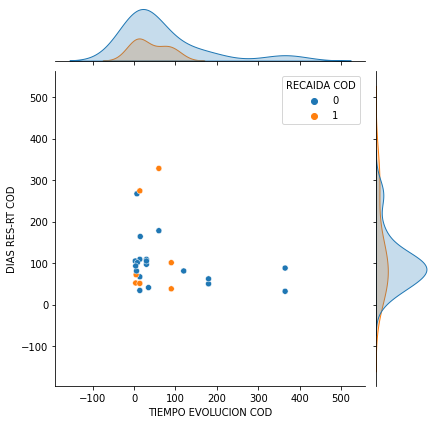

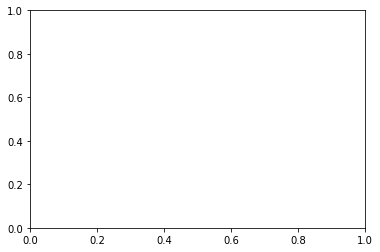

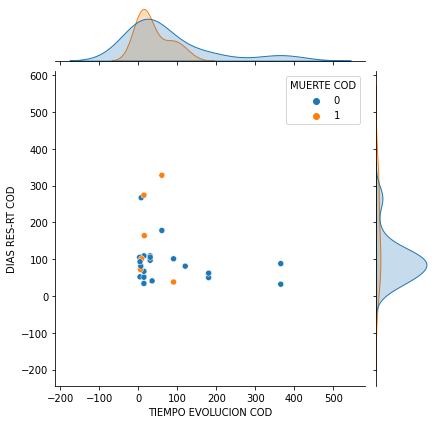

In [ ]:
for i in list_to_plot:
  fig, ax = plt.subplots()
  sns.jointplot(data = df, x="TIEMPO EVOLUCION COD", y="DIAS RES-RT COD", hue=i, palette="tab10")
  plt.show()

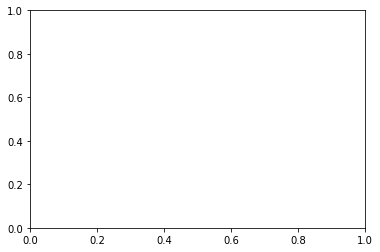

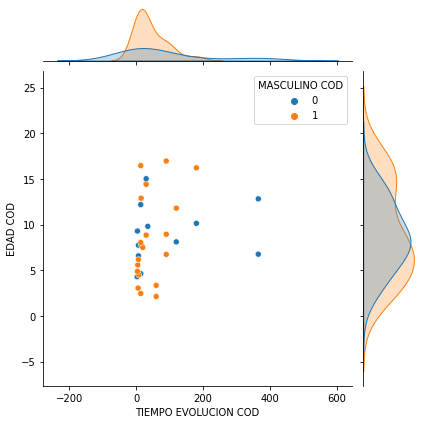

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

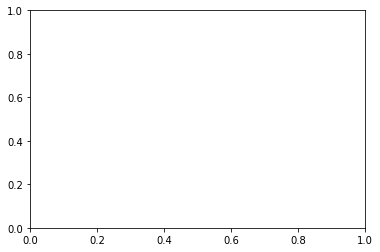

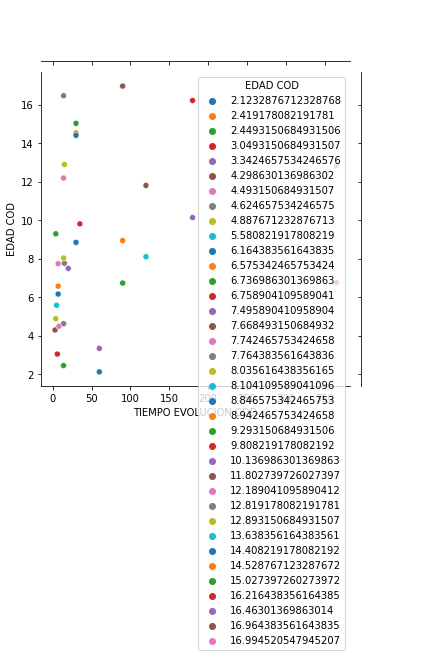

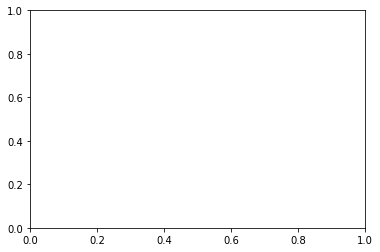

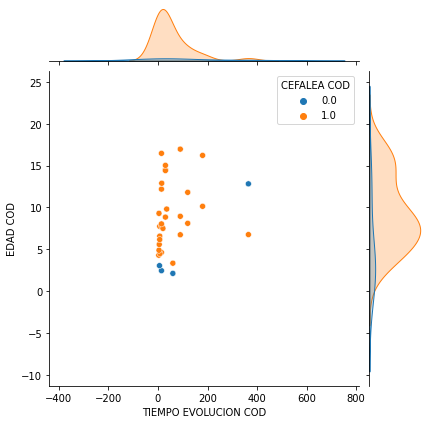

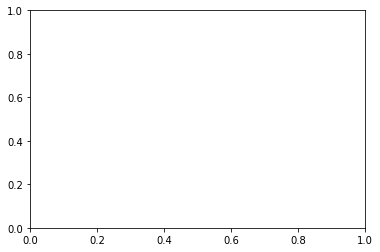

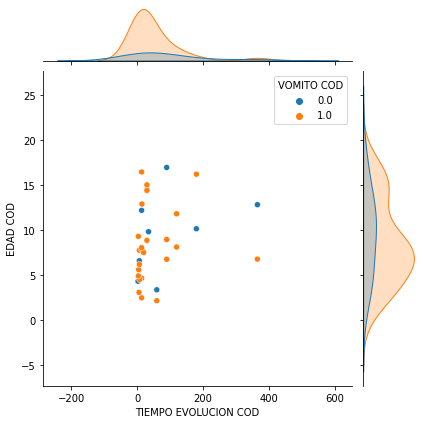

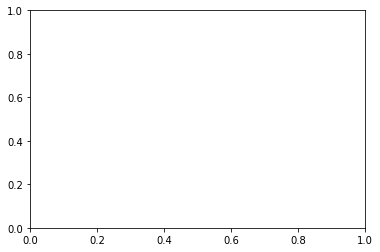

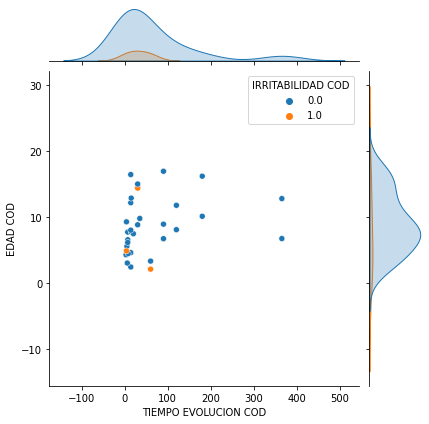

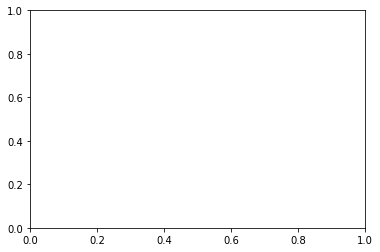

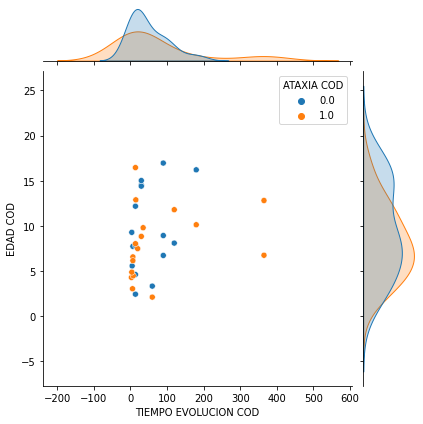

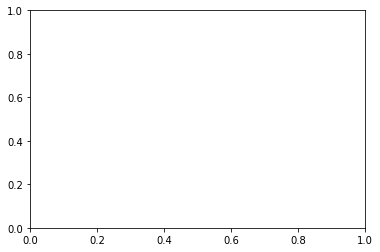

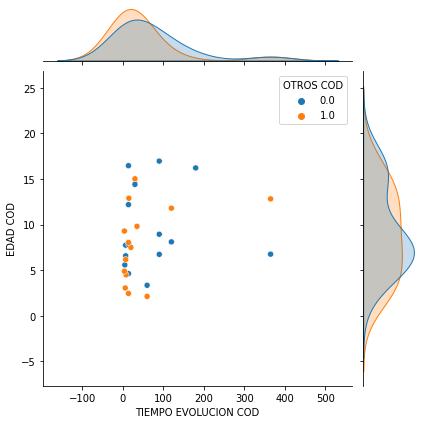

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

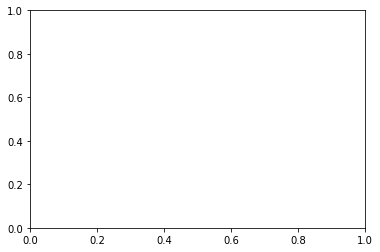

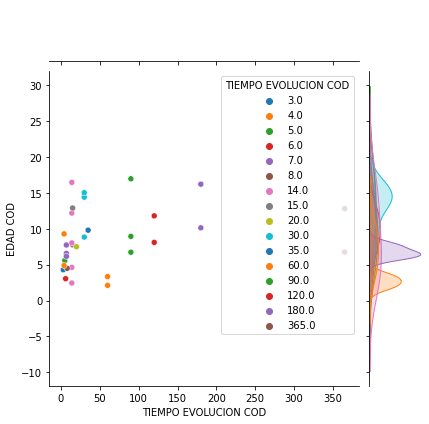

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


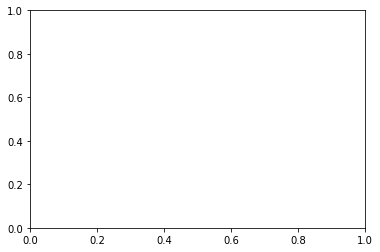

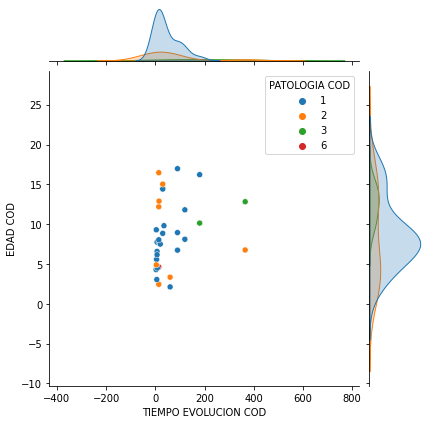

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

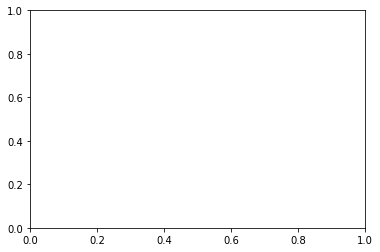

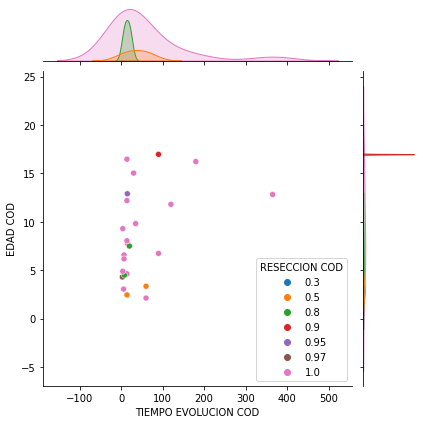

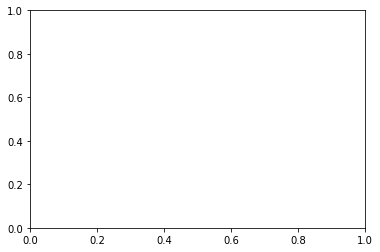

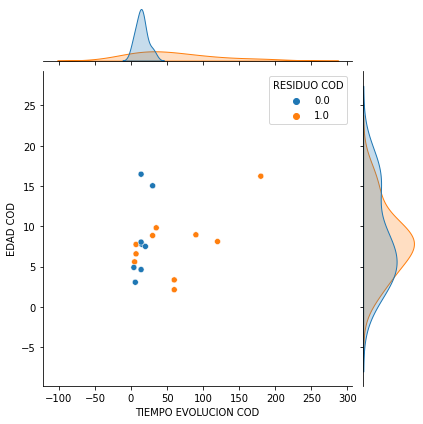

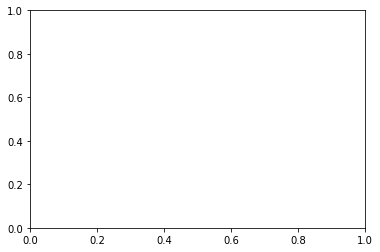

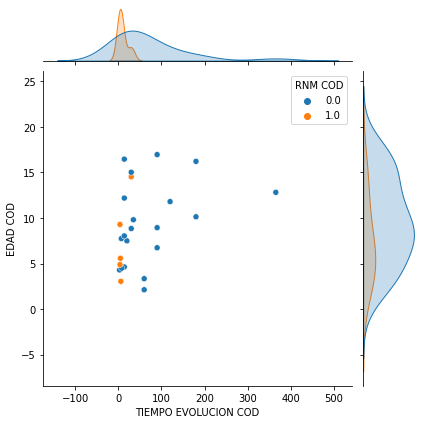

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


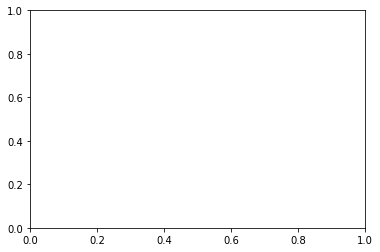

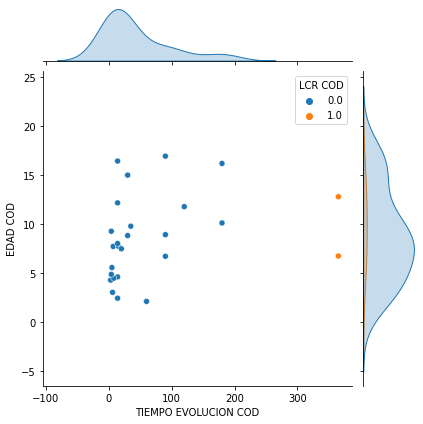

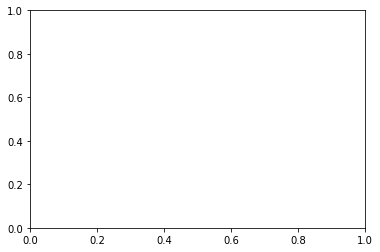

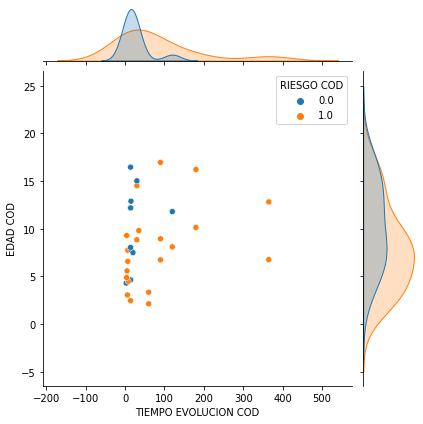

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

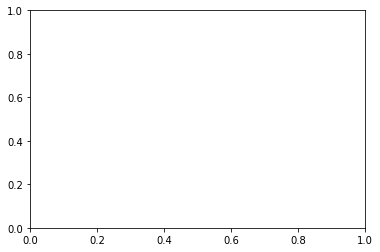

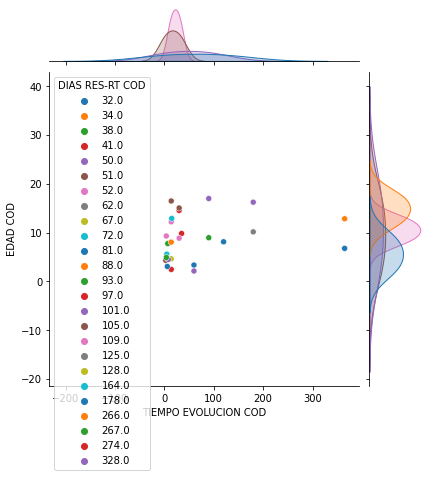

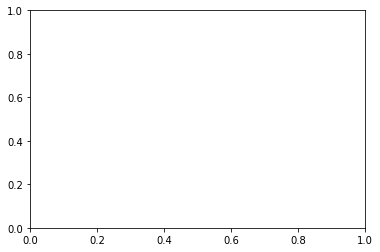

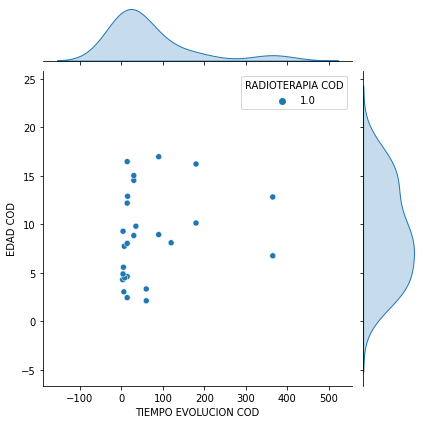

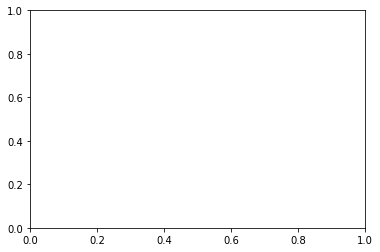

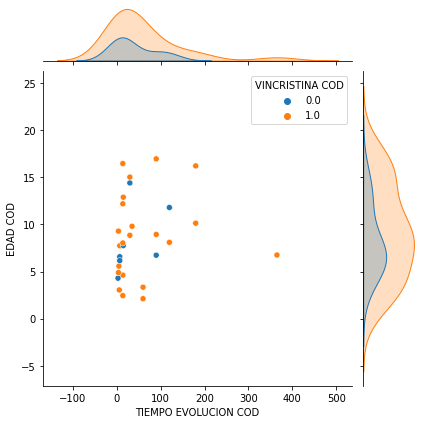

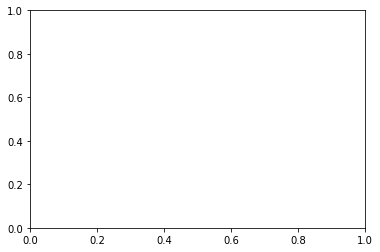

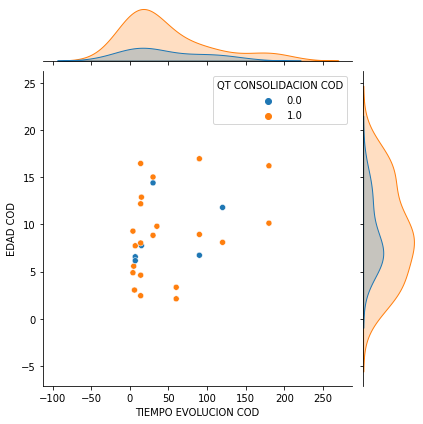

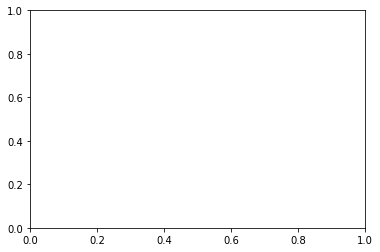

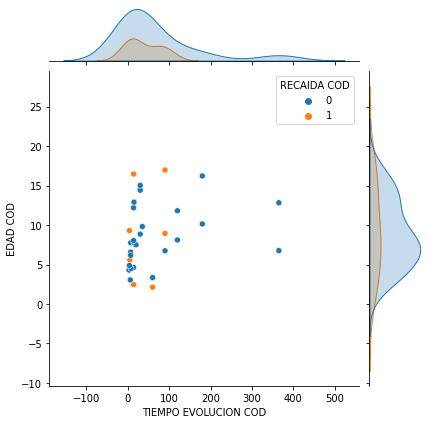

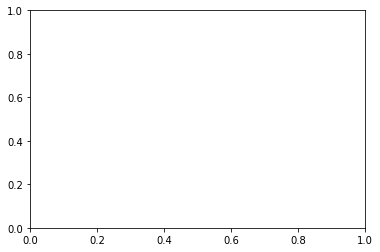

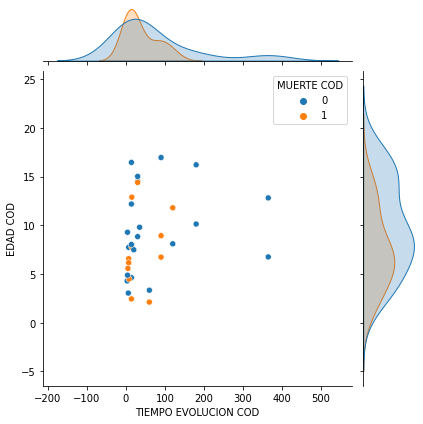

In [ ]:
for i in list_to_plot:
  fig, ax = plt.subplots()
  sns.jointplot(data = df, x="TIEMPO EVOLUCION COD", y="EDAD COD", hue=i, palette="tab10")
  plt.show()

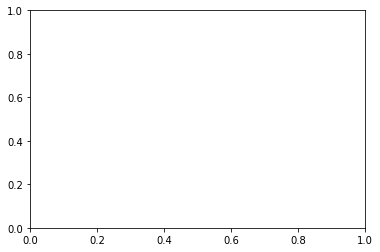

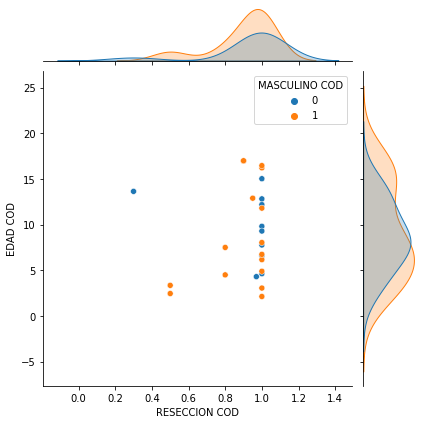

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

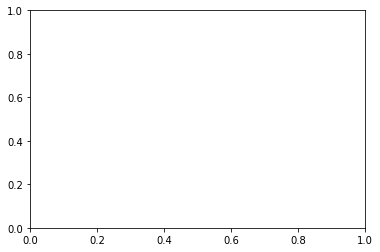

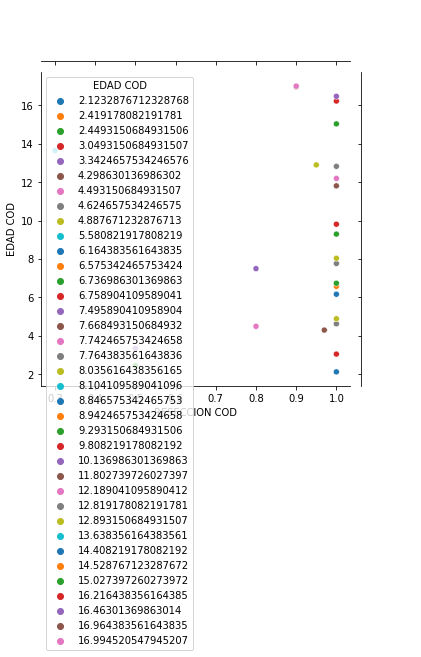

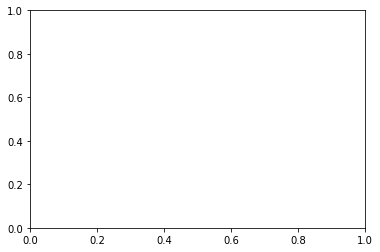

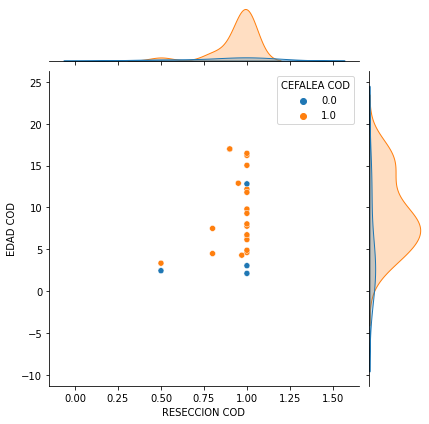

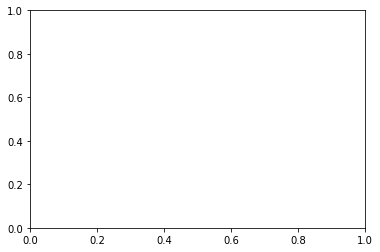

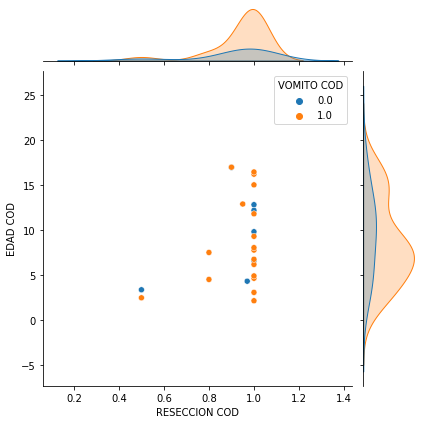

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


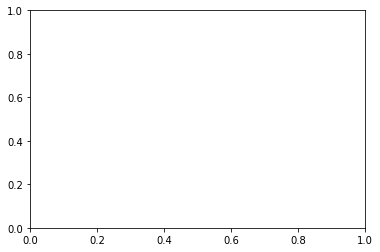

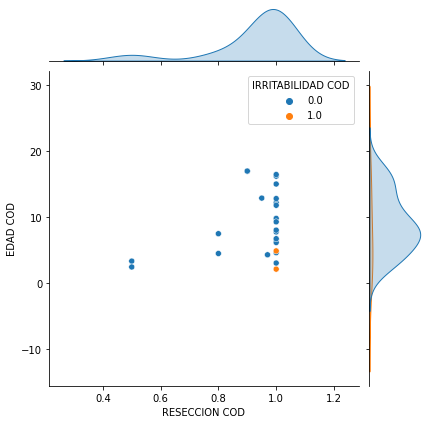

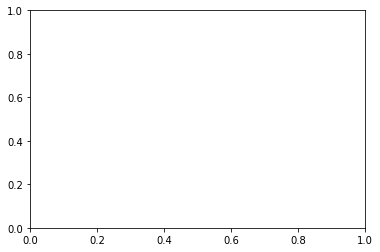

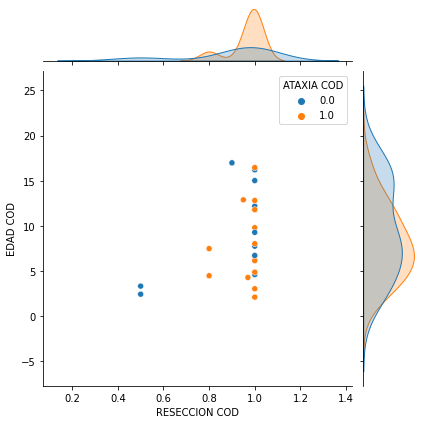

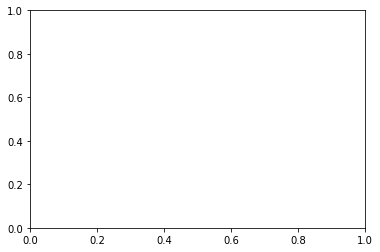

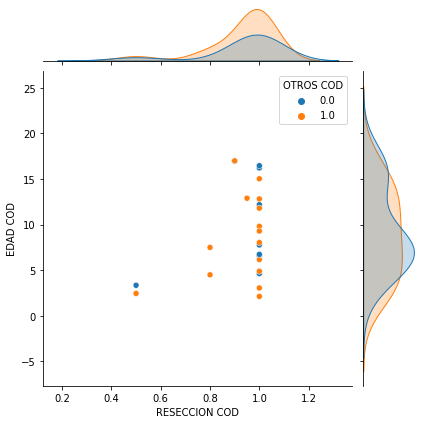

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

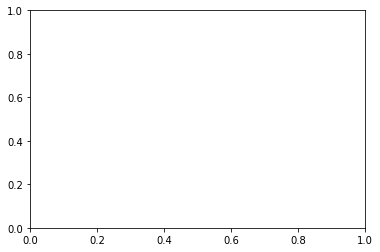

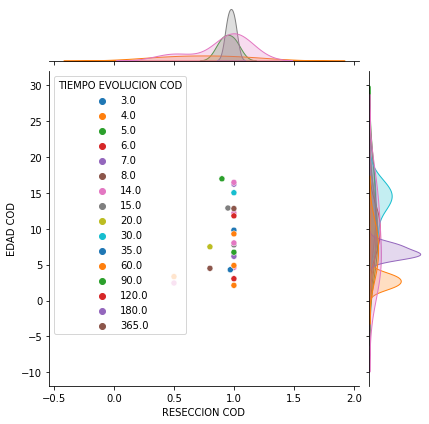

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


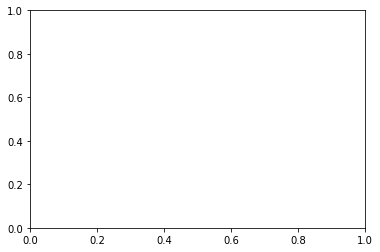

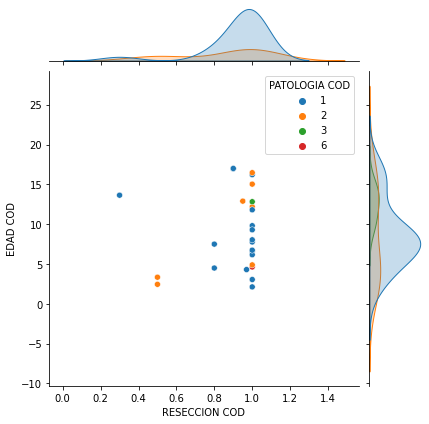

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

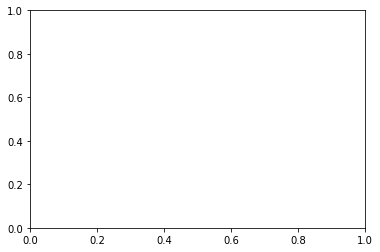

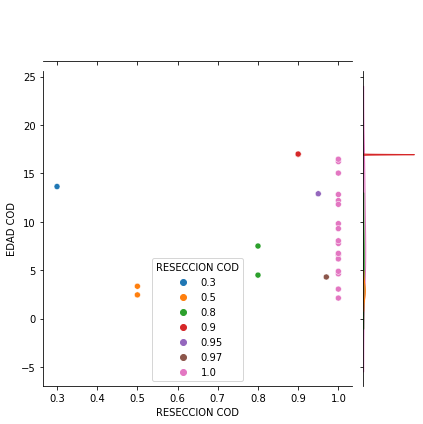

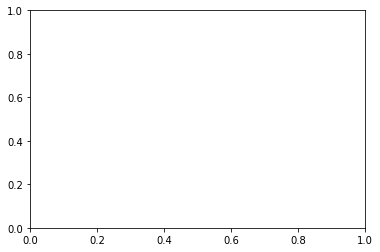

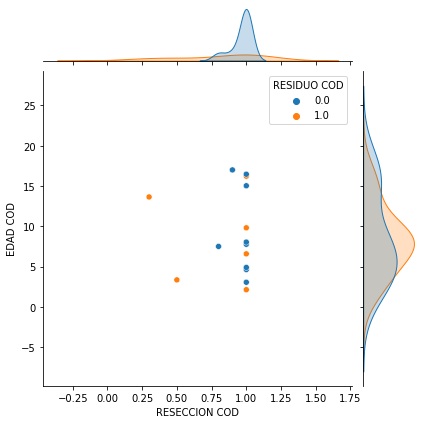

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


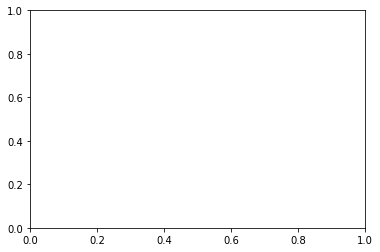

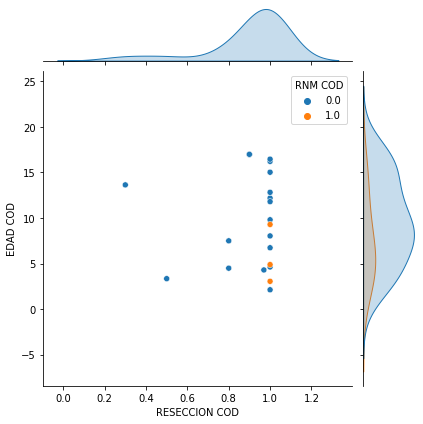

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


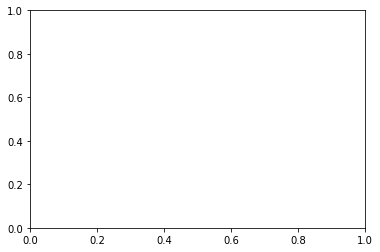

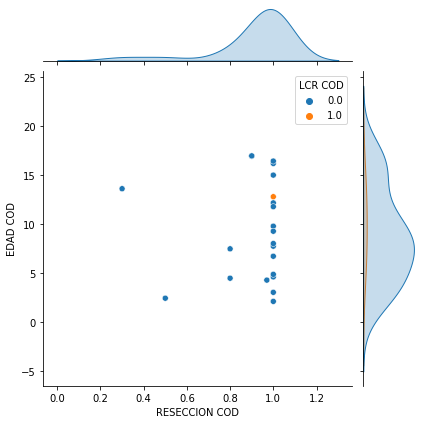

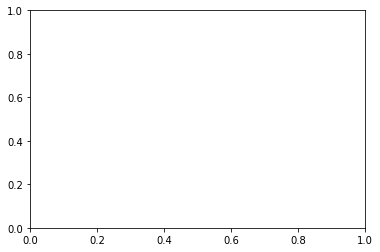

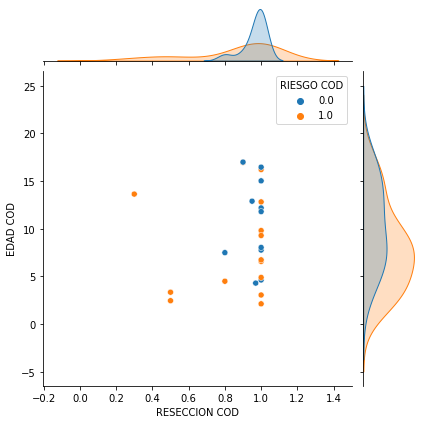

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

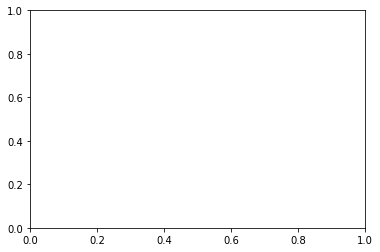

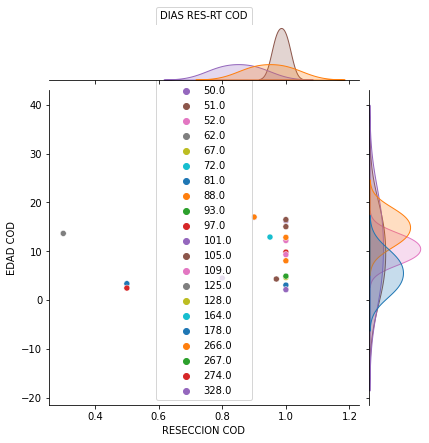

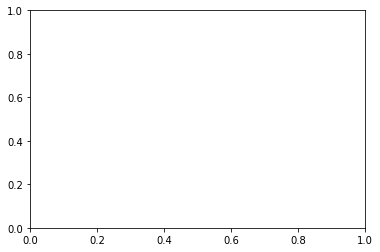

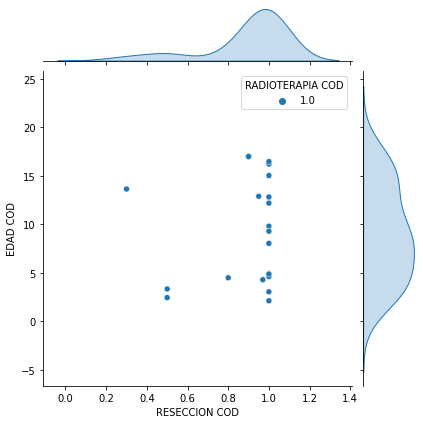

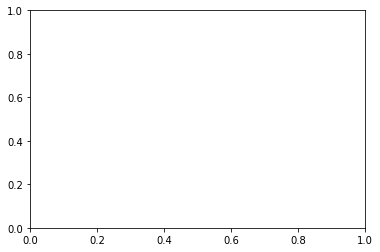

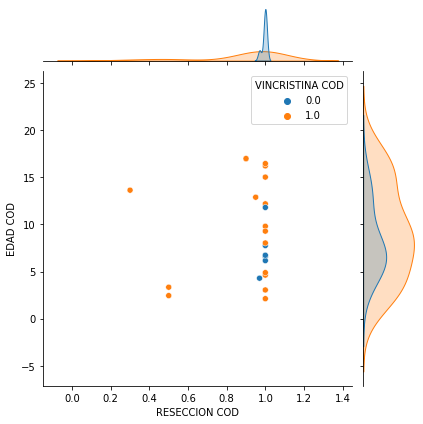

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


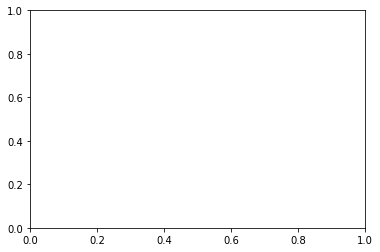

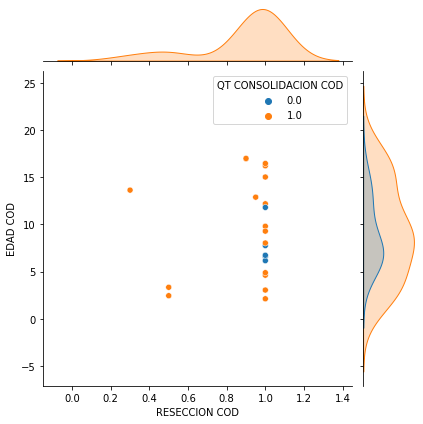

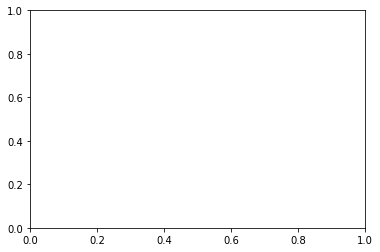

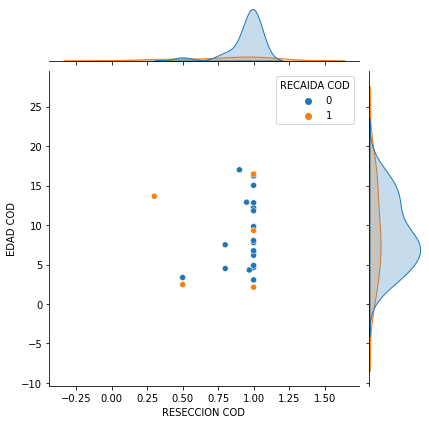

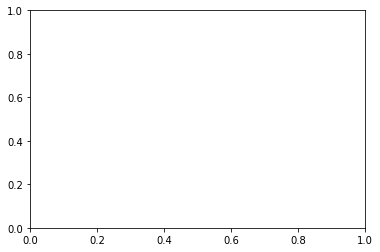

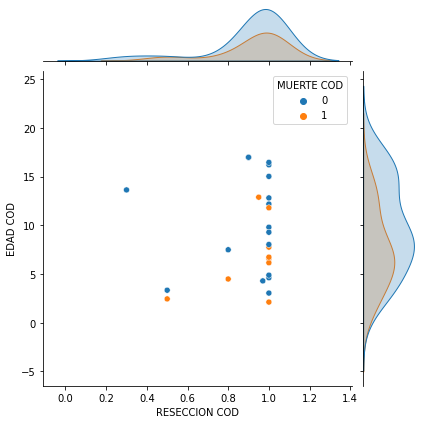

In [ ]:
for i in list_to_plot:
  fig, ax = plt.subplots()
  sns.jointplot(data = df, x="RESECCION COD", y="EDAD COD", hue=i, palette="tab10")
  plt.show()

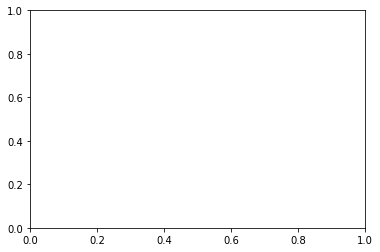

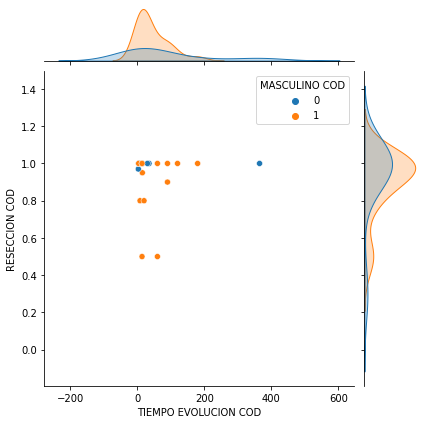

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

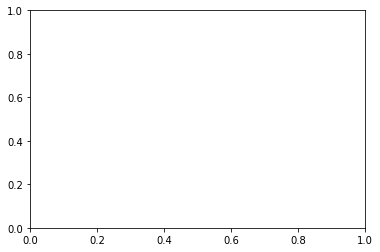

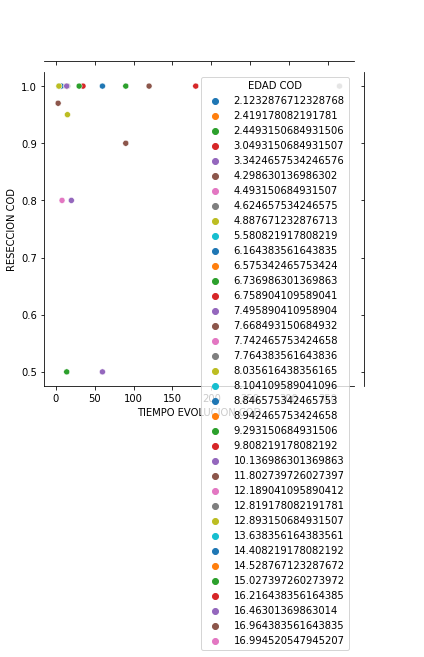

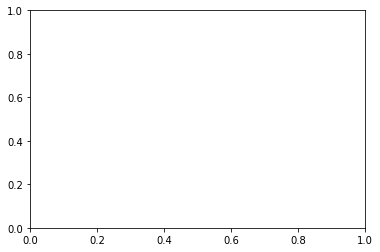

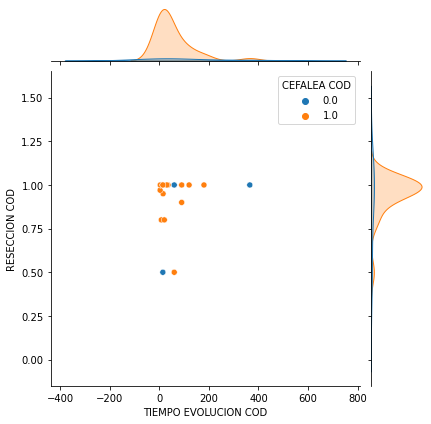

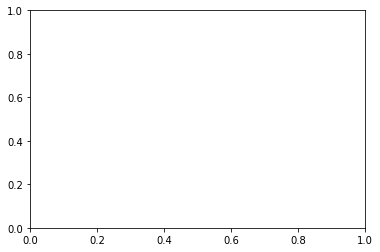

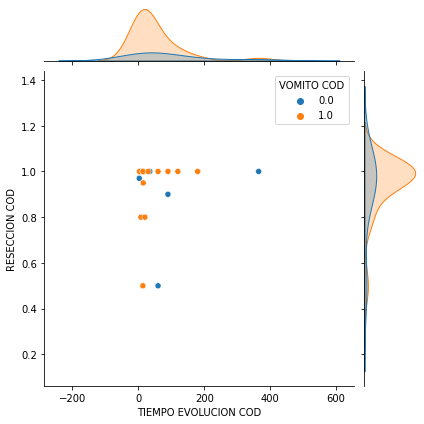

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


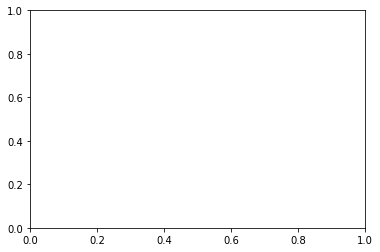

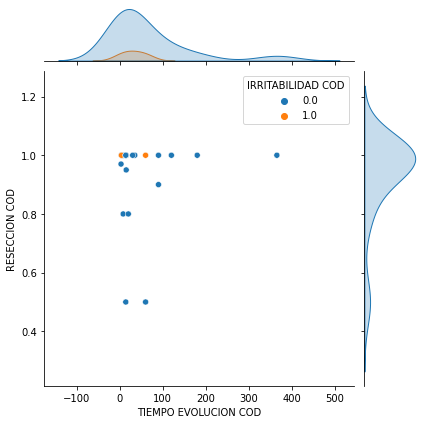

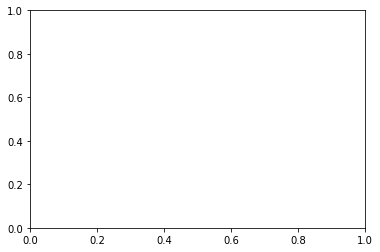

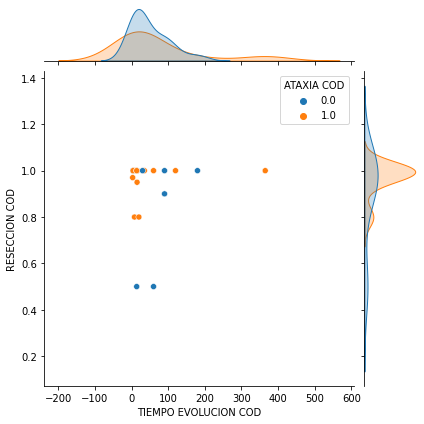

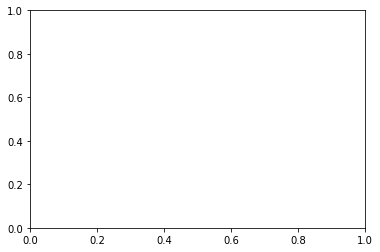

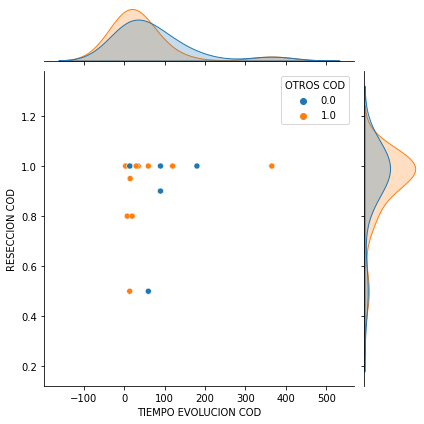

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

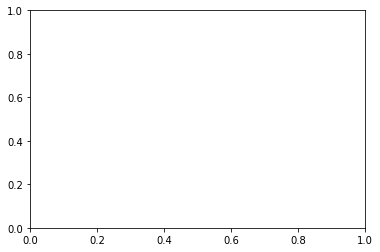

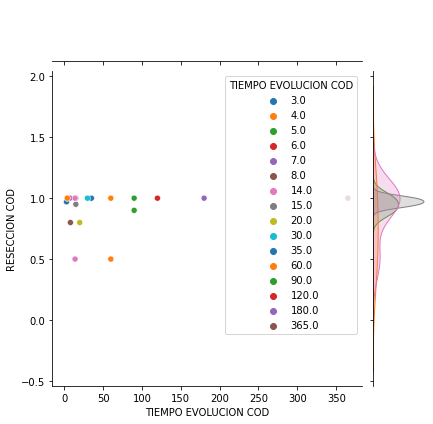

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


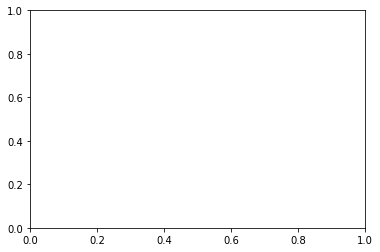

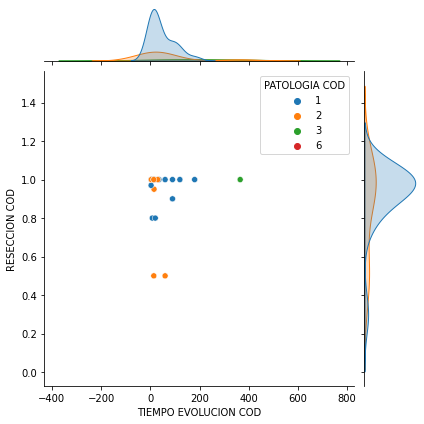

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

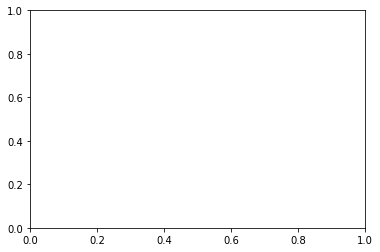

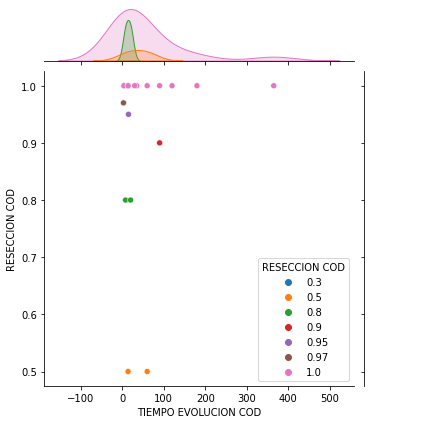

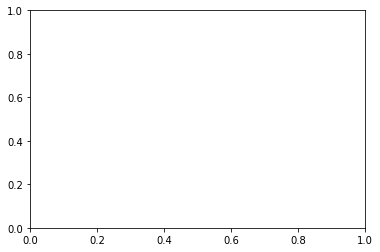

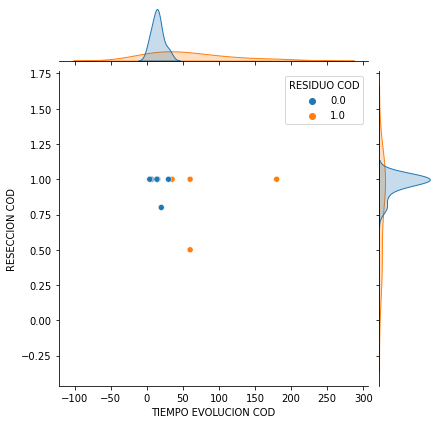

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


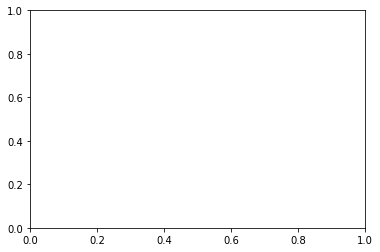

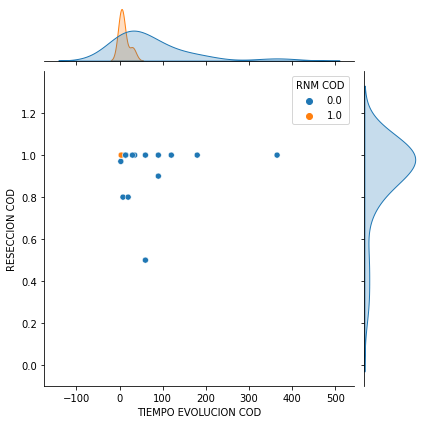

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


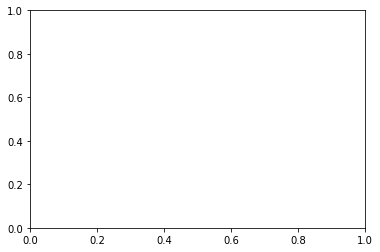

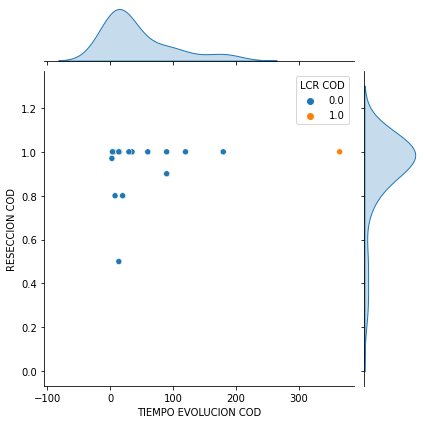

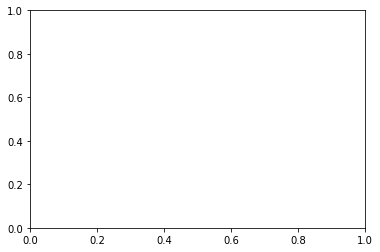

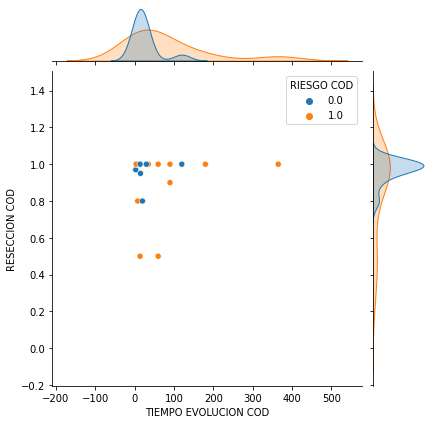

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

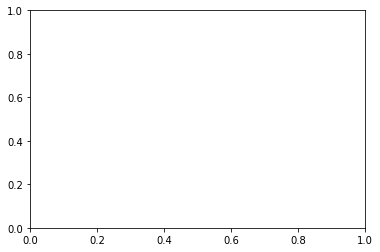

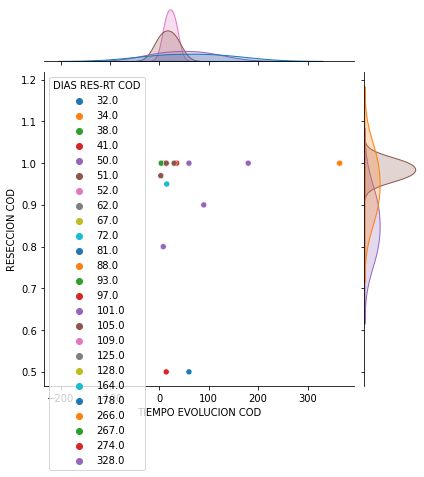

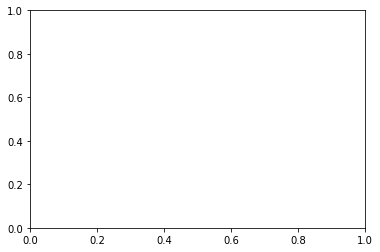

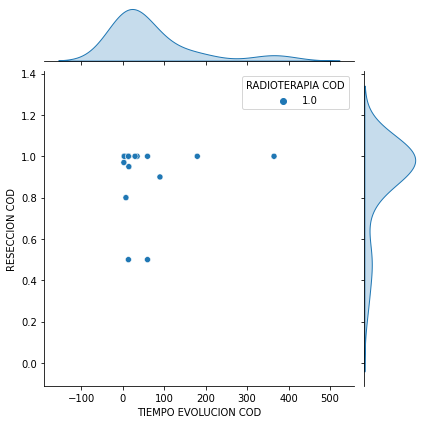

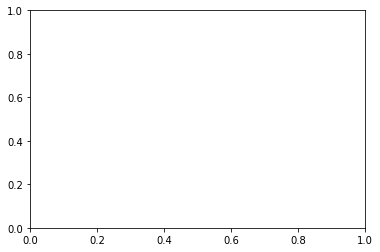

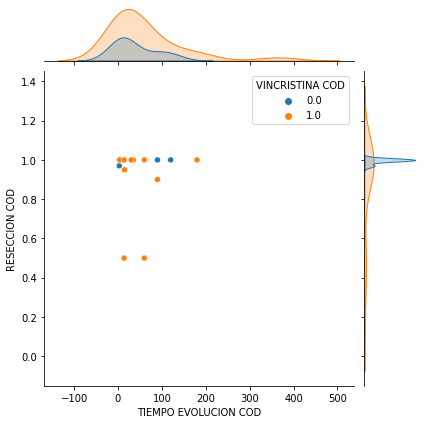

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


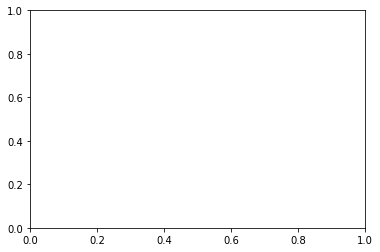

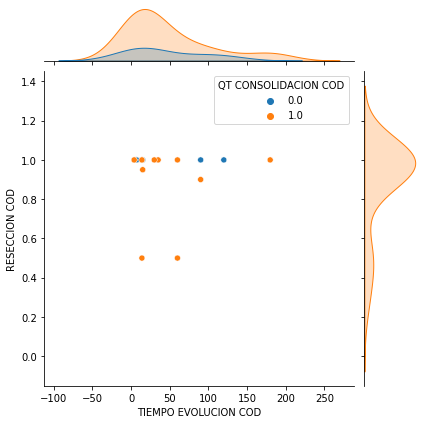

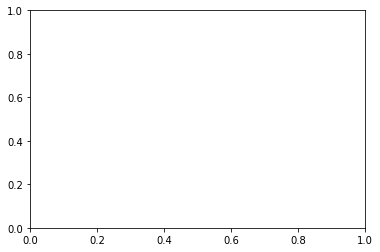

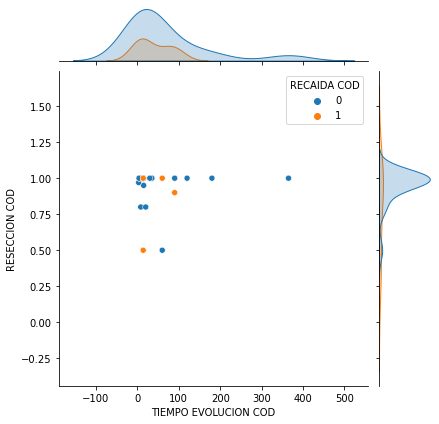

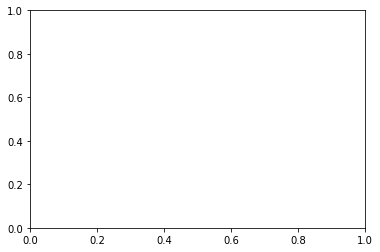

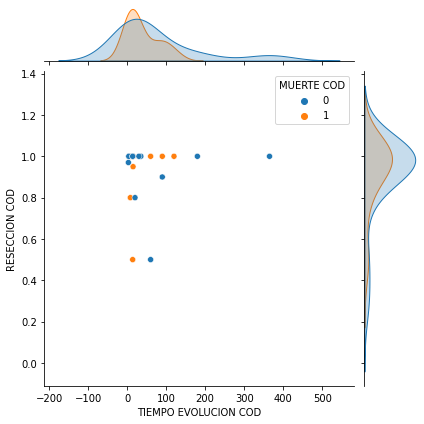

In [ ]:
for i in list_to_plot:
  fig, ax = plt.subplots()
  sns.jointplot(data = df, x="TIEMPO EVOLUCION COD", y="RESECCION COD", hue=i, palette="tab10")
  plt.show()

In [ ]:
list_to_plot

Index(['MASCULINO COD', 'EDAD COD', 'CEFALEA COD', 'VOMITO COD',
       'IRRITABILIDAD COD', 'ATAXIA COD', 'OTROS COD', 'TIEMPO EVOLUCION COD',
       'PATOLOGIA COD', 'RESECCION COD', 'RESIDUO COD', 'RNM COD', 'LCR COD',
       'RIESGO COD', 'DIAS RES-RT COD', 'RADIOTERAPIA COD', 'VINCRISTINA COD',
       'QT CONSOLIDACION COD', 'RECAIDA COD', 'MUERTE COD'],
      dtype='object')

## Predictive Model:

In [ ]:
df.columns

Index(['MASCULINO COD', 'EDAD COD', 'CEFALEA COD', 'VOMITO COD',
       'IRRITABILIDAD COD', 'ATAXIA COD', 'OTROS COD', 'TIEMPO EVOLUCION COD',
       'PATOLOGIA COD', 'RESECCION COD', 'RESIDUO COD', 'RNM COD', 'LCR COD',
       'RIESGO COD', 'DIAS RES-RT COD', 'RADIOTERAPIA COD', 'VINCRISTINA COD',
       'QT CONSOLIDACION COD', 'RECAIDA COD', 'MUERTE COD'],
      dtype='object')

In [ ]:
variables_to_model = ['MASCULINO COD', 'EDAD COD', 'CEFALEA COD', 'VOMITO COD',
       'IRRITABILIDAD COD', 'ATAXIA COD', 'OTROS COD', 'TIEMPO EVOLUCION COD',
       'PATOLOGIA COD', 'RESECCION COD', 'RESIDUO COD', 'RNM COD',
       'RIESGO COD', 'DIAS RES-RT COD', 'RADIOTERAPIA COD', 'VINCRISTINA COD',
       'QT CONSOLIDACION COD', 'RECAIDA COD']

In [ ]:
df2 = df.dropna()
df2

In [ ]:
for i in variables_to_model:
  temp_df = df[['MUERTE COD',i]].dropna()
  logit_model=sm.Logit(temp_df['MUERTE COD'],temp_df[i])
  result=logit_model.fit()
  print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.690687
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.096 
Dependent Variable: MUERTE COD       AIC:              53.1108
Date:               2021-08-07 01:00 BIC:              54.7217
No. Observations:   37               Log-Likelihood:   -25.555
Df Model:           0                LL-Null:          -23.313
Df Residuals:       36               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     4.0000                                    
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
MASCULINO COD   -0.1823   0.4282 -0.4258 0.6702 -1.0215 0.6569

Optimization terminated successfully.
         Current function value: 0.604630
         Iterations 5


In [ ]:
temp_df2 = df[['MUERTE COD','PATOLOGIA COD','TIEMPO EVOLUCION COD','VINCRISTINA COD', 'EDAD COD']].dropna()
logit_model2=sm.Logit(temp_df2[['MUERTE COD']] , temp_df2[['TIEMPO EVOLUCION COD','VINCRISTINA COD','PATOLOGIA COD', 'EDAD COD']])
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.559689
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             MUERTE COD   No. Observations:                   29
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.1567
Time:                        01:27:42   Log-Likelihood:                -16.231
converged:                       True   LL-Null:                       -19.248
Covariance Type:            nonrobust   LLR p-value:                    0.1100
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
TIEMPO EVOLUCION COD    -0.0015      0.006     -0.231      0.818      -0.014       0.011

In [ ]:
temp_df2.describe()

MUERTE COD  PATOLOGIA COD  ...  VINCRISTINA COD   EDAD COD
count   29.000000      29.000000  ...        29.000000  29.000000
mean     0.379310       1.517241  ...         0.758621   8.663108
std      0.493804       1.021927  ...         0.435494   4.330557
min      0.000000       1.000000  ...         0.000000   2.123288
25%      0.000000       1.000000  ...         1.000000   5.580822
50%      0.000000       1.000000  ...         1.000000   8.035616
75%      1.000000       2.000000  ...         1.000000  11.802740
max      1.000000       6.000000  ...         1.000000  16.964384

[8 rows x 5 columns]

In [ ]:
logit_model = statsmodels.discrete.discrete_model.Logit(temp_df2[['MUERTE COD']],  temp_df2[['TIEMPO EVOLUCION COD','VINCRISTINA COD','PATOLOGIA COD', 'EDAD COD']]).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.559689
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             MUERTE COD   No. Observations:                   29
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.1567
Time:                        01:37:18   Log-Likelihood:                -16.231
converged:                       True   LL-Null:                       -19.248
Covariance Type:            nonrobust   LLR p-value:                    0.1100
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
TIEMPO EVOLUCION COD    -0.0015      0.006     -0.231      0.818      -0.014       0.011
VINCRISTINA COD         -1.8220      0.983     -1.853      0.064      -3.750       0.106
PATOLOGIA COD            0.0776      0.408      0.190      0.849      -0.722       0.877
EDAD COD                 0.0608      0.077      0.792      0.429      -0.090       0.211
========================================================================================
"""

In [ ]:
model_to_test = statsmodels.discrete.discrete_model.Logit(temp_df2[['MUERTE COD']],  temp_df2[['TIEMPO EVOLUCION COD','VINCRISTINA COD','PATOLOGIA COD']]).fit()
prediction = np.round(model_to_test.predict())
prediction

Optimization terminated successfully.
         Current function value: 0.570894
         Iterations 5


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [ ]:
np.array(temp_df2['MUERTE COD'])

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0])

In [ ]:
prediction == np.array(temp_df2['MUERTE COD'])

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
test_result = (prediction == np.array(temp_df2['MUERTE COD']))
test_result = np.ndarray.tolist(test_result)
dict((i, test_result.count(i)) for i in test_result)

{False: 6, True: 23}

In [ ]:
1-(6/29)

0.7931034482758621